# 🧭 Étape 1 – Effectuez une analyse exploratoire des fichiers de données

**Projet 4 : Classifiez automatiquement des informations**


**✍️ Auteur :** *[Raymond Francius]*   
**📚 Rôle :** *[Apprenant - Promotion Sept-2025]* — **Engineering AI** — **Openclassrooms**    
🗓️ **Date de mise à jour :** *[10-11-2025]*

---

Dans cette première étape, je réalise une **analyse exploratoire approfondie** des trois fichiers sources mis à disposition :

`1 - extrait_sirh.csv` : informations RH (âge, genre, poste, salaire, ancienneté, etc.).  
`2 - extrait_eval.csv` : résultats des évaluations de performance et satisfaction.  
`3 - extrait_sondage.csv` : réponses au sondage interne incluant la **variable cible** `a_quitte_l_entreprise`.

L’objectif est de **comprendre la structure, la qualité et les relations entre les données** avant toute modélisation :

- Identifier les types de variables (quantitatives continues/discrètes, qualitatives ordinales/nominales)  
- Détecter et traiter les valeurs manquantes, incohérences, doublons et outliers  
- Vérifier et harmoniser les clés de jointure (`id_employee`, `eval_number`, `code_sondage`)  
- Produire un **DataFrame central** propre et exploitable  
- Générer des statistiques descriptives, tests (corrélations, ANOVA, Chi²) et visualisations  
- Exporter les jeux nettoyés, les figures et un rapport automatique de profiling  

Je vous accompagnerai pas à pas à travers cette exploration : inspection, nettoyage, analyses et documentation.  

---



## **1. Initialisation automatique de l’environnement à partir de `pyproject.toml`**

Cette cellule configure automatiquement l'environnement Colab à partir du fichier :
`/content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/pyproject.toml`


### 🚀 Fonctionnalités :
- 🔍 Détection automatique du projet et du fichier `pyproject.toml`
- 💾 Montage du Google Drive (si nécessaire)
- 📦 Installation automatique des dépendances déclarées
- ✅ Vérification des principales bibliothèques installées (`pandas`, `numpy`, `sklearn`, `ydata_profiling`)

> 💡 À exécuter au **début de chaque notebook Colab** du projet pour garantir que l’environnement est bien configuré.


In [1]:

#===========================================================
# ✅ CELLULE 1 – Initialisation automatique via pyproject.toml
#===========================================================


import os
import sys
import subprocess


# --- 1️⃣ Montage automatique du Google Drive ---
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    print("✅ Google Drive monté avec succès.\n")
except Exception as e:
    print(f"⚠️ Impossible de monter Google Drive automatiquement : {e}\n")

# --- 2️⃣ Localisation du projet ---
project_dir = "/content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique"
pyproject_path = os.path.join(project_dir, "pyproject.toml")

if not os.path.exists(pyproject_path):
    raise FileNotFoundError(f"❌ Fichier pyproject.toml introuvable à l’emplacement : {pyproject_path}")

print(f"📄 Fichier pyproject.toml détecté : {pyproject_path}\n")

# --- 3️⃣ Lecture du fichier TOML ---
try:
    import tomllib  # intégré depuis Python 3.11
except ImportError:
    subprocess.run([sys.executable, "-m", "pip", "install", "tomli", "--quiet"])
    import tomli as tomllib

with open(pyproject_path, "rb") as f:
    pyproject = tomllib.load(f)

dependencies = pyproject.get("project", {}).get("dependencies", [])

if not dependencies:
    print("⚠️ Aucune dépendance trouvée dans [project] → dependencies.")
else:
    print("📦 Dépendances détectées :")
    for dep in dependencies:
        print(f"  - {dep}")
    print("\n🚀 Installation en cours...\n")

    for dep in dependencies:
        subprocess.run([sys.executable, "-m", "pip", "install", dep, "--quiet"])
    print("\n✅ Installation terminée avec succès.\n")

# --- 4️⃣ Vérification des principales bibliothèques ---
print("🔎 Vérification des principales bibliothèques...\n")
try:
    import pandas, numpy, sklearn, ydata_profiling
    print("🎉 Environnement prêt : toutes les bibliothèques principales sont disponibles.")
except ImportError as e:
    print(f"❌ Une bibliothèque est manquante : {e}")


Mounted at /content/drive
✅ Google Drive monté avec succès.

📄 Fichier pyproject.toml détecté : /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/pyproject.toml

📦 Dépendances détectées :
  - pandas>=2.1.0
  - numpy>=1.26.0
  - matplotlib>=3.8.0
  - seaborn>=0.13.0
  - scipy>=1.11.0
  - scikit-learn>=1.5.0
  - category-encoders>=2.6.3
  - joblib>=1.3.0
  - xgboost>=2.0.0
  - lightgbm>=4.0.0
  - shap>=0.44.0
  - ydata-profiling>=4.6.0
  - jupyter>=1.0.0
  - notebook>=7.0.0
  - uvicorn>=0.30.0

🚀 Installation en cours...


✅ Installation terminée avec succès.

🔎 Vérification des principales bibliothèques...

🎉 Environnement prêt : toutes les bibliothèques principales sont disponibles.


## **2. Import des bibliothèques et configuration**

Cette cellule initialise l’environnement de travail du projet et prépare les répertoires nécessaires à l’analyse.

### 🔍 Objectifs :
- Importer toutes les bibliothèques Python utilisées dans les étapes suivantes :
  - `pandas`, `numpy`, `matplotlib`, `seaborn`, `scipy`, `ydata_profiling`
- Définir la structure des répertoires selon le projet `Projet4_classification_automatique` :
  - **data/raw** → données sources brutes  
  - **data/processed** → données nettoyées et prêtes à l’analyse  
  - **data/reports** → rapports automatiques générés  
  - **outputs/figures** → graphiques et visualisations produits
- Créer automatiquement les dossiers manquants si besoin.
- Configurer les options d’affichage pour `pandas` et le style de visualisation `seaborn`.

### 🧩 Vérification :
La cellule affiche à la fin les chemins utilisés pour confirmer que la configuration du projet est correcte.


In [2]:

# =================================================================
# 💻 CELLULE 2 – Import des bibliothèques et configuration
# =================================================================


# Les dépendances sont déjà installées via la cellule d’initialisation pyproject.toml
# Il suffit donc d’importer les modules nécessaires et de définir les chemins de base.

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from ydata_profiling import ProfileReport


# =================================================================
# 🗂️ Définition des répertoires du projet
# (selon la structure utilisée dans Projet4_classification_automatique)
# =================================================================

# Si la variable PROJECT_DIR a été définie dans la cellule 1, on s’en sert
PROJECT_DIR = globals().get("PROJECT_DIR", "/content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique")

DATA_RAW_DIR = os.path.join(PROJECT_DIR, "data", "raw")
DATA_PROCESSED_DIR = os.path.join(PROJECT_DIR, "data", "processed")
REPORTS_DIR = os.path.join(PROJECT_DIR, "data", "reports")
OUTPUTS_DIR = os.path.join(PROJECT_DIR, "outputs")
FIGURES_DIR = os.path.join(OUTPUTS_DIR, "figures")

# Crée les dossiers manquants
for d in [DATA_RAW_DIR, DATA_PROCESSED_DIR, REPORTS_DIR, OUTPUTS_DIR, FIGURES_DIR]:
    os.makedirs(d, exist_ok=True)

# =================================================================
# 🔧 Configuration de pandas & seaborn
# =================================================================
pd.set_option('display.max_columns', 100)
sns.set(style="whitegrid")

# =================================================================
# ✅ Vérification de la configuration
# =================================================================
print("\n📁 Répertoires utilisés :")
print(f"RAW → {DATA_RAW_DIR}")
print(f"PROCESSED → {DATA_PROCESSED_DIR}")
print(f"REPORTS → {REPORTS_DIR}")
# print(f"OUTPUTS → {OUTPUTS_DIR}")
print(f"FIGURES → {FIGURES_DIR}")



📁 Répertoires utilisés :
RAW → /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/data/raw
PROCESSED → /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/data/processed
REPORTS → /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/data/reports
FIGURES → /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/outputs/figures


## **3. Vérification et upload des fichiers sources**

Cette cellule a pour objectif de s’assurer que tous les fichiers de données nécessaires à l’analyse sont bien présents dans le dossier **data/raw** du projet.

### 🎯 Objectifs :
- Vérifier la présence des trois fichiers CSV attendus :  
  `1 - extrait_sirh.csv`    
  `2 - extrait_eval.csv`  
  `3 - extrait_sondage.csv`  
- Identifier les fichiers manquants et proposer leur **téléversement manuel** via l’interface Colab.
- Enregistrer automatiquement les fichiers uploadés dans le répertoire `DATA_RAW_DIR`.

### ⚙️ Fonctionnement :
- Si tous les fichiers sont trouvés → un message de confirmation s’affiche.  
- Si un ou plusieurs fichiers manquent → un module d’upload s’ouvre pour permettre à l’utilisateur d’importer les fichiers manquants.  
- Chaque fichier uploadé est ensuite sauvegardé dans le dossier `data/raw`.

### 📁 Résultat attendu :
Une confirmation indiquant que **tous les fichiers sources nécessaires** sont présents et prêts pour les étapes d’analyse exploratoire.


In [3]:

# =================================================================
# 📂 CELLULE 3 – Vérification et upload des fichiers sources
# =================================================================


expected_files = [
    "1 - extrait_sirh.csv",
    "2 - extrait_eval.csv",
    "3 - extrait_sondage.csv"
]
missing = [f for f in expected_files if not os.path.exists(os.path.join(DATA_RAW_DIR, f))]

if missing:
    print("⚠️ Fichiers manquants :", missing)
    uploaded = files.upload()
    for name in uploaded.keys():
        path = os.path.join(DATA_RAW_DIR, name)
        with open(path, "wb") as f:
            f.write(uploaded[name])
        print(f"✅ {name} sauvegardé dans {path}")
else:
    print("✅ Tous les fichiers sources sont présents.")


✅ Tous les fichiers sources sont présents.


## **4. Chargement et aperçu global des données**

Cette cellule charge les trois fichiers sources au format CSV et affiche un aperçu rapide de leur contenu.

### 🎯 Objectifs :
- Charger les fichiers CSV suivants depuis le répertoire `data/raw` :  
  `1 - extrait_sirh.csv` → Données RH des collaborateurs (SIRH)  
  `2 - extrait_eval.csv` → Données d’évaluation des performances  
  `3 - extrait_sondage.csv` → Données issues des enquêtes et sondages internes
- Vérifier que les fichiers ont bien été lus sans erreur.
- Afficher pour chaque jeu de données :
  - Le **nombre de lignes et de colonnes**.
  - Les **3 premières lignes** du DataFrame pour en observer la structure générale.

### 📊 Intérêt :
Cette étape permet une première validation visuelle du contenu, afin d’identifier :
- la cohérence des en-têtes de colonnes,
- la présence éventuelle de valeurs manquantes,
- la taille des différents fichiers avant l’analyse exploratoire.

### 🧩 Étape suivante :
Ces DataFrames serviront de base pour les étapes de **nettoyage**, **fusion** et **analyse descriptive**.


In [4]:

# =================================================================
# 🔍 CELLULE 4 – Chargement et aperçu global
# =================================================================


paths = {
    "sirh": os.path.join(DATA_RAW_DIR, "1 - extrait_sirh.csv"),
    "eval": os.path.join(DATA_RAW_DIR, "2 - extrait_eval.csv"),
    "sondage": os.path.join(DATA_RAW_DIR, "3 - extrait_sondage.csv")
}

df_sirh = pd.read_csv(paths["sirh"], low_memory=False)
df_eval = pd.read_csv(paths["eval"], low_memory=False)
df_sondage = pd.read_csv(paths["sondage"], low_memory=False)

for name, df in [("SIRH", df_sirh), ("EVAL", df_eval), ("SONDAGE", df_sondage)]:
    print(f"{name} : {df.shape[0]} lignes × {df.shape[1]} colonnes")
    display(df.head(3))


SIRH : 1470 lignes × 12 colonnes


,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,nombre_heures_travailless,annee_experience_totale,annees_dans_l_entreprise,annees_dans_le_poste_actuel
0,1,41,F,5993,Célibataire,Commercial,Cadre Commercial,8,80,8,6,4
1,2,49,M,5130,Marié(e),Consulting,Assistant de Direction,1,80,10,10,7
2,4,37,M,2090,Célibataire,Consulting,Consultant,6,80,7,0,0


EVAL : 1470 lignes × 10 colonnes


,satisfaction_employee_environnement,note_evaluation_precedente,niveau_hierarchique_poste,satisfaction_employee_nature_travail,satisfaction_employee_equipe,satisfaction_employee_equilibre_pro_perso,eval_number,note_evaluation_actuelle,heure_supplementaires,augementation_salaire_precedente
0,2,3,2,4,1,1,E_1,3,Oui,11 %
1,3,2,2,2,4,3,E_2,4,Non,23 %
2,4,2,1,3,2,3,E_4,3,Oui,15 %


SONDAGE : 1470 lignes × 12 colonnes


,a_quitte_l_entreprise,nombre_participation_pee,nb_formations_suivies,nombre_employee_sous_responsabilite,code_sondage,distance_domicile_travail,niveau_education,domaine_etude,ayant_enfants,frequence_deplacement,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel
0,Oui,0,0,1,1,1,2,Infra & Cloud,Y,Occasionnel,0,5
1,Non,1,3,1,2,8,1,Infra & Cloud,Y,Frequent,1,7
2,Oui,0,3,1,4,2,2,Autre,Y,Occasionnel,0,0


## **5. Inspection détaillée & typologie des données**

Cette cellule a pour objectif d’examiner en profondeur la structure et la composition des trois jeux de données (`SIRH`, `EVAL`, `SONDAGE`) afin d’en identifier les principales caractéristiques avant le nettoyage et l’analyse exploratoire.

### 🎯 Objectifs :
- Explorer la **typologie** de chaque DataFrame :
  - Nombre total de lignes et de colonnes  
  - Types de variables (`int64`, `float64`, `object`, etc.)  
  - Taux de **valeurs manquantes** par colonne (en %)  
  - Nombre de **doublons** détectés  
- Fournir un **résumé statistique** complet (via `describe(include='all')`) incluant :
  - Les valeurs numériques (moyenne, médiane, min, max, etc.)
  - Les variables catégorielles (valeurs uniques, plus fréquentes, etc.)

### ⚙️ Fonctionnement :
Une fonction utilitaire `describe_file(df, name)` est définie pour automatiser l’analyse descriptive de chaque fichier.
Elle est ensuite appliquée successivement aux trois jeux de données :
- `df_sirh` → Données RH  
- `df_eval` → Données d’évaluation  
- `df_sondage` → Données de sondage  

### 📈 Résultat attendu :
Pour chaque dataset, un diagnostic complet s’affiche :
- Dimensions du tableau  
- Types de colonnes  
- Pourcentage de valeurs manquantes  
- Nombre de doublons  
- Tableau récapitulatif des statistiques descriptives

Ces informations serviront à guider les décisions de **nettoyage**, **normalisation** et **fusion** dans les prochaines étapes.


In [5]:

# =================================================================
# 📊 CELLULE 5 – Inspection détaillée & typologie
# =================================================================


def describe_file(df, name):
    print(f"\n=== {name} ===")
    print("Dimensions :", df.shape)
    print("\nTypes :")
    print(df.dtypes.value_counts())
    print("\nValeurs manquantes (%) :")
    print((df.isna().mean()*100).round(2))
    print("\nDoublons :", df.duplicated().sum())
    display(df.describe(include='all').T)

describe_file(df_sirh, "SIRH")
describe_file(df_eval, "EVAL")
describe_file(df_sondage, "SONDAGE")



=== SIRH ===
Dimensions : (1470, 12)

Types :
int64     8
object    4
Name: count, dtype: int64

Valeurs manquantes (%) :
id_employee                       0.0
age                               0.0
genre                             0.0
revenu_mensuel                    0.0
statut_marital                    0.0
departement                       0.0
poste                             0.0
nombre_experiences_precedentes    0.0
nombre_heures_travailless         0.0
annee_experience_totale           0.0
annees_dans_l_entreprise          0.0
annees_dans_le_poste_actuel       0.0
dtype: float64

Doublons : 0


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id_employee,1470.0,NaN,NaN,NaN,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
age,1470.0,NaN,NaN,NaN,36.92381,9.135373,18.0,30.0,36.0,43.0,60.0
genre,1470,2,M,882,NaN,NaN,NaN,NaN,NaN,NaN,NaN
revenu_mensuel,1470.0,NaN,NaN,NaN,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
statut_marital,1470,3,Marié(e),673,NaN,NaN,NaN,NaN,NaN,NaN,NaN
departement,1470,3,Consulting,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
poste,1470,9,Cadre Commercial,326,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nombre_experiences_precedentes,1470.0,NaN,NaN,NaN,2.693197,2.498009,0.0,1.0,2.0,4.0,9.0
nombre_heures_travailless,1470.0,NaN,NaN,NaN,80.0,0.0,80.0,80.0,80.0,80.0,80.0
annee_experience_totale,1470.0,NaN,NaN,NaN,11.279592,7.780782,0.0,6.0,10.0,15.0,40.0



=== EVAL ===
Dimensions : (1470, 10)

Types :
int64     7
object    3
Name: count, dtype: int64

Valeurs manquantes (%) :
satisfaction_employee_environnement          0.0
note_evaluation_precedente                   0.0
niveau_hierarchique_poste                    0.0
satisfaction_employee_nature_travail         0.0
satisfaction_employee_equipe                 0.0
satisfaction_employee_equilibre_pro_perso    0.0
eval_number                                  0.0
note_evaluation_actuelle                     0.0
heure_supplementaires                        0.0
augementation_salaire_precedente             0.0
dtype: float64

Doublons : 0


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
satisfaction_employee_environnement,1470.0,NaN,NaN,NaN,2.721769,1.093082,1.0,2.0,3.0,4.0,4.0
note_evaluation_precedente,1470.0,NaN,NaN,NaN,2.729932,0.711561,1.0,2.0,3.0,3.0,4.0
niveau_hierarchique_poste,1470.0,NaN,NaN,NaN,2.063946,1.10694,1.0,1.0,2.0,3.0,5.0
satisfaction_employee_nature_travail,1470.0,NaN,NaN,NaN,2.728571,1.102846,1.0,2.0,3.0,4.0,4.0
satisfaction_employee_equipe,1470.0,NaN,NaN,NaN,2.712245,1.081209,1.0,2.0,3.0,4.0,4.0
satisfaction_employee_equilibre_pro_perso,1470.0,NaN,NaN,NaN,2.761224,0.706476,1.0,2.0,3.0,3.0,4.0
eval_number,1470,1470,E_2068,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
note_evaluation_actuelle,1470.0,NaN,NaN,NaN,3.153741,0.360824,3.0,3.0,3.0,3.0,4.0
heure_supplementaires,1470,2,Non,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN
augementation_salaire_precedente,1470,15,11 %,210,NaN,NaN,NaN,NaN,NaN,NaN,NaN



=== SONDAGE ===
Dimensions : (1470, 12)

Types :
int64     8
object    4
Name: count, dtype: int64

Valeurs manquantes (%) :
a_quitte_l_entreprise                  0.0
nombre_participation_pee               0.0
nb_formations_suivies                  0.0
nombre_employee_sous_responsabilite    0.0
code_sondage                           0.0
distance_domicile_travail              0.0
niveau_education                       0.0
domaine_etude                          0.0
ayant_enfants                          0.0
frequence_deplacement                  0.0
annees_depuis_la_derniere_promotion    0.0
annes_sous_responsable_actuel          0.0
dtype: float64

Doublons : 0


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
a_quitte_l_entreprise,1470,2,Non,1233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nombre_participation_pee,1470.0,NaN,NaN,NaN,0.793878,0.852077,0.0,0.0,1.0,1.0,3.0
nb_formations_suivies,1470.0,NaN,NaN,NaN,2.79932,1.289271,0.0,2.0,3.0,3.0,6.0
nombre_employee_sous_responsabilite,1470.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
code_sondage,1470.0,NaN,NaN,NaN,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
distance_domicile_travail,1470.0,NaN,NaN,NaN,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
niveau_education,1470.0,NaN,NaN,NaN,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
domaine_etude,1470,6,Infra & Cloud,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ayant_enfants,1470,1,Y,1470,NaN,NaN,NaN,NaN,NaN,NaN,NaN
frequence_deplacement,1470,3,Occasionnel,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **6. Classification des variables (exemple : SIRH)**

Cette cellule vise à **catégoriser les variables** du jeu de données `SIRH` en fonction de leur nature statistique, selon le **dictionnaire de données** fourni ou une observation préalable.

### 🎯 Objectifs :
- Identifier le type de chaque variable afin de faciliter :
  - les **analyses statistiques appropriées**,  
  - le **choix des visualisations**,  
  - la **préparation au modèle de classification automatique**.
- Structurer les variables du DataFrame `SIRH` en quatre grandes catégories :
  1. **Variables quantitatives continues** → valeurs numériques à grande échelle (ex. revenus, âges, heures travaillées)
  2. **Variables quantitatives discrètes** → valeurs entières comptables (ex. années d’ancienneté)
  3. **Variables qualitatives nominales** → catégories sans ordre logique (ex. poste, département)
  4. **Variables qualitatives ordinales** → catégories hiérarchisées (ex. niveau de séniorité)

### ⚙️ Fonctionnement :
- Un dictionnaire Python `sirh_types` est défini pour regrouper les colonnes du fichier `SIRH` selon leur type.
- Une boucle parcourt les catégories et affiche pour chacune :
  - le **type de variable**,
  - le **nombre de colonnes correspondantes**,
  - la **liste des noms de colonnes**.

### 📈 Résultat attendu :
Une sortie structurée listant les variables de `SIRH` selon leur typologie :
```
quant_cont (3) : ['revenu_mensuel', 'age', 'nombre_heures_travaillees']
quant_disc (3) : ['annees_dans_l_entreprise', 'annees_dans_le_poste_actuel', 'nb_expe_prev']
qual_nom (4) : ['departement', 'poste', 'statut_marital', 'genre']
qual_ord (1) : ['niveau_seniorite']
```


Cette classification servira de base pour les futures **analyses de corrélations**, **tests statistiques** et **sélections de variables**.


In [6]:

# =================================================================
# 🧩 CELLULE 6 – Classification des variables (exemple SIRH)
# =================================================================


# Exemple d'identification manuelle selon le dictionnaire de données
sirh_types = {
    "quant_cont": ["revenu_mensuel", "age", "nombre_heures_travaillees"], # 🔢 Quantitatives continues
    "quant_disc": ["annees_dans_l_entreprise", "annees_dans_le_poste_actuel", "nb_expe_prev"], # 🔢 Quantitatives discrètes
    "qual_nom": ["departement", "poste", "statut_marital", "genre"], # 🔠 Qualitatives nominales
    "qual_ord": ["niveau_seniorite"] # 🔠 Qualitatives ordinales
}
for cat, cols in sirh_types.items():
    print(f"{cat} ({len(cols)}) : {cols}")


quant_cont (3) : ['revenu_mensuel', 'age', 'nombre_heures_travaillees']
quant_disc (3) : ['annees_dans_l_entreprise', 'annees_dans_le_poste_actuel', 'nb_expe_prev']
qual_nom (4) : ['departement', 'poste', 'statut_marital', 'genre']
qual_ord (1) : ['niveau_seniorite']


## **6bis. Classification des variables (exemple : EVAL)**

Cette cellule complète la précédente (CELLULE 6) en appliquant la même démarche de **typologie des variables** au jeu de données `EVAL`.  
Elle s’appuie sur le **dictionnaire de données** pour identifier la nature de chaque variable, ce qui facilitera les analyses statistiques et la préparation du modèle de classification.

### 🎯 Objectifs :
- Déterminer la **nature statistique** des colonnes du DataFrame `EVAL` :
  - Variables quantitatives continues  
  - Variables quantitatives discrètes  
  - Variables qualitatives nominales  
  - Variables qualitatives ordinales
- Structurer les variables selon leur rôle analytique afin d’adapter :
  - les **tests statistiques** à appliquer,  
  - les **méthodes de visualisation** pertinentes,  
  - la **préparation des features** pour le machine learning.

### ⚙️ Fonctionnement :
- Un dictionnaire `eval_types` est défini pour regrouper les colonnes selon leur catégorie :
  - `quant_cont` → quantitatives continues  
  - `quant_disc` → quantitatives discrètes  
  - `qual_nom` → qualitatives nominales  
  - `qual_ord` → qualitatives ordinales
- Une boucle affiche le résumé des catégories avec :
  - le nom du type,
  - le nombre de variables,
  - la liste des colonnes correspondantes.

### 📈 Résultat attendu :
Une sortie structurée listant les variables du jeu de données **EVAL**, par exemple :
```
quant_cont (0) : []
quant_disc (6) : ['satisfaction_employee_environnement', 'note_evaluation_precedente', 'satisfaction_employee_nature_travail', ...]
qual_nom (3) : ['eval_number', 'heure_supplementaires', 'augementation_salaire_precedente']
qual_ord (1) : ['niveau_hierarchique_poste']
```


Cette classification permettra de guider les **analyses exploratoires ciblées** et la **sélection des variables pertinentes** pour les futures étapes du projet.



In [7]:

# =================================================================
# 🧩 CELLULE 6bis – Classification des variables (exemple EVAL)
# =================================================================

# Exemple d'identification manuelle selon le dictionnaire de données

eval_types = {
    "quant_cont": [], # 🔢 Quantitatives continues
    "quant_disc": [
        "satisfaction_employee_environnement",
        "note_evaluation_precedente",
        "satisfaction_employee_nature_travail",
        "satisfaction_employee_equipe",
        "satisfaction_employee_equilibre_pro_perso",
        "note_evaluation_actuelle"
    ], # 🔢 Quantitatives discrètes
    "qual_nom": [
        "eval_number",
        "heure_supplementaires",
        "augementation_salaire_precedente"
    ], # 🔠 Qualitatives nominales
    "qual_ord": [
        "niveau_hierarchique_poste"
    ] # 🔠 Qualitatives ordinales
}

# Affichage récapitulatif
for cat, cols in eval_types.items():
    print(f"{cat} ({len(cols)}) : {cols}")


quant_cont (0) : []
quant_disc (6) : ['satisfaction_employee_environnement', 'note_evaluation_precedente', 'satisfaction_employee_nature_travail', 'satisfaction_employee_equipe', 'satisfaction_employee_equilibre_pro_perso', 'note_evaluation_actuelle']
qual_nom (3) : ['eval_number', 'heure_supplementaires', 'augementation_salaire_precedente']
qual_ord (1) : ['niveau_hierarchique_poste']


## **6ter. Classification des variables (exemple : SONDAGE)**

Cette cellule applique la même méthodologie de **typologie des variables** que les cellules précédentes, cette fois-ci sur le jeu de données `SONDAGE`.  
L’objectif est d’identifier la nature des variables pour guider les analyses statistiques et les futures étapes de modélisation.

### 🎯 Objectifs :
- Identifier et classer les variables du DataFrame `SONDAGE` selon leur type :
  - **Quantitatives continues** : valeurs mesurées sur une échelle continue (ex. distances, mesures physiques)
  - **Quantitatives discrètes** : valeurs entières issues de comptages (ex. nombre de formations, années, participations)
  - **Qualitatives nominales** : catégories sans hiérarchie (ex. domaine d’étude, code sondage)
  - **Qualitatives ordinales** : catégories avec ordre logique (ex. niveau d’éducation, fréquence de déplacement)
- Préparer la base pour les futures analyses :
  - choix des **tests statistiques** adaptés,
  - **sélection de variables** pertinentes,
  - **préparation des visualisations exploratoires**.

### ⚙️ Fonctionnement :
- Un dictionnaire `sondage_types` regroupe les variables selon leur typologie.
- Une boucle parcourt les catégories et affiche :
  - le **type de variable** (`quant_cont`, `quant_disc`, `qual_nom`, `qual_ord`),
  - le **nombre de colonnes** par catégorie,
  - la **liste des variables** correspondantes.

### 📈 Résultat attendu :
Une sortie claire résumant la classification des variables du jeu de données `SONDAGE` :
```
quant_cont (1) : ['distance_domicile_travail']
quant_disc (5) : ['nombre_participation_pee', 'nb_formations_suivies', 'nombre_employee_sous_responsabilite', ...]
qual_nom (4) : ['a_quitte_l_entreprise', 'code_sondage', 'domaine_etude', 'ayant_enfants']
qual_ord (2) : ['niveau_education', 'frequence_deplacement']
```

Cette typologie facilitera les étapes d’analyse exploratoire, de nettoyage et de préparation des données pour les modèles de classification.



In [8]:

# =================================================================
# 🧩 CELLULE 6ter – Classification des variables (exemple SONDAGE)
# =================================================================

# Exemple d'identification manuelle selon le dictionnaire de données
sondage_types = {
    # 🔢 Quantitatives continues (mesures sur une échelle continue)
    "quant_cont": [
        "distance_domicile_travail"
    ],
    # 🔢 Quantitatives discrètes (comptages, scores entiers)
    "quant_disc": [
        "nombre_participation_pee",
        "nb_formations_suivies",
        "nombre_employee_sous_responsabilite",
        "annees_depuis_la_derniere_promotion",
        "annes_sous_responsable_actuel"
    ],
    # 🔠 Qualitatives nominales (catégories, identifiants, booléens textuels)
    "qual_nom": [
        "a_quitte_l_entreprise",
        "code_sondage",
        "domaine_etude",
        "ayant_enfants"
    ],
    # 🔠 Qualitatives ordinales (catégories avec ordre)
    "qual_ord": [
        "niveau_education",
        "frequence_deplacement"
    ]
}

for cat, cols in sondage_types.items():
    print(f"{cat} ({len(cols)}) : {cols}")


quant_cont (1) : ['distance_domicile_travail']
quant_disc (5) : ['nombre_participation_pee', 'nb_formations_suivies', 'nombre_employee_sous_responsabilite', 'annees_depuis_la_derniere_promotion', 'annes_sous_responsable_actuel']
qual_nom (4) : ['a_quitte_l_entreprise', 'code_sondage', 'domaine_etude', 'ayant_enfants']
qual_ord (2) : ['niveau_education', 'frequence_deplacement']


## **7. Nettoyage des données du fichier `df_sirh`**

Cette cellule effectue un **nettoyage complet et structuré** du jeu de données SIRH.  
L’objectif est de garantir la cohérence, la qualité et la fiabilité des informations avant l’analyse exploratoire.

### 🧾 Étapes réalisées :

1️⃣ **Normalisation des noms de colonnes** : suppression des espaces, conversion en minuscules.  
2️⃣ **Suppression des doublons** : basée sur la colonne `id_employee` si elle existe.  
3️⃣ **Sélection des colonnes numériques** pour imputation et détection d’anomalies.  
4️⃣ **Imputation des valeurs manquantes** par la **médiane** pour les variables numériques.  
5️⃣ **Uniformisation du texte** dans les colonnes catégorielles (`genre`, `statut_marital`, `departement`, `poste`).  
6️⃣ **Détection des outliers (valeurs aberrantes)** via la méthode de l’IQR (Interquartile Range).  
7️⃣ **Vérification finale** avec un aperçu du DataFrame nettoyé.

💡 *Cette étape permet de préparer un DataFrame propre et exploitable pour les phases suivantes de l’analyse exploratoire et de la modélisation.*


In [9]:

# =================================================================
# 🧼 CELLULE 7 – Nettoyage : valeurs manquantes, formats, outliers (adapté à df_sirh)
# =================================================================


# --- 1️⃣ Normaliser les noms de colonnes ---
df_sirh.columns = df_sirh.columns.str.strip().str.lower()
print("Colonnes détectées :", df_sirh.columns.tolist())

# --- 2️⃣ Suppression des doublons ---
if "id_employee" in df_sirh.columns:
    df_sirh = df_sirh.drop_duplicates(subset="id_employee")
    print("✅ Doublons supprimés sur : 'id_employee'")
else:
    print("⚠️ Colonne 'id_employee' introuvable : vérifie le fichier source.")

# --- 3️⃣ Colonnes numériques pour imputation et détection des outliers ---
cols_num = [
    "age",
    "revenu_mensuel",
    "nombre_experiences_precedentes",
    "nombre_heures_travailless",
    "annee_experience_totale",
    "annees_dans_l_entreprise",
    "annees_dans_le_poste_actuel"
]
cols_num = [c for c in cols_num if c in df_sirh.columns]

print(f"Colonnes utilisées pour imputation/outliers : {cols_num}")

# --- 4️⃣ Imputation des valeurs manquantes (médiane) ---
for col in cols_num:
    if df_sirh[col].isna().any():
        median_val = df_sirh[col].median()
        df_sirh[col].fillna(median_val, inplace=True)
        print(f"🩹 Valeurs manquantes imputées (médiane={median_val:.2f}) → {col}")

# --- 5️⃣ Uniformisation des colonnes texte ---
cols_text = ["genre", "statut_marital", "departement", "poste"]

# Compteur de colonnes traitées
colonnes_traitees = 0

for col in cols_text:
    if col in df_sirh.columns:
        # Nettoyage texte
        df_sirh[col] = df_sirh[col].astype(str).str.strip().str.lower()

        # Affichage des valeurs uniques (10 premières max)
        valeurs_uniques = df_sirh[col].unique()
        print(f"✅ Colonne '{col}' uniformisée — valeurs uniques après nettoyage :")
        print(valeurs_uniques[:10])
        print("-" * 80)

        colonnes_traitees += 1
    else:
        print(f"⚠️ Colonne '{col}' absente du DataFrame — ignorée.")
        print("-" * 80)

# Résumé final
print(f"🔹 Nombre total de colonnes textuelles uniformisées : {colonnes_traitees}/{len(cols_text)}")

# --- 6️⃣ Détection des outliers via IQR ---
for col in cols_num:
    Q1, Q3 = df_sirh[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    outliers = df_sirh[(df_sirh[col] < Q1 - 1.5 * IQR) | (df_sirh[col] > Q3 + 1.5 * IQR)]
    print(f"{col} : {len(outliers)} outliers détectés")

# --- 7️⃣ Vérification finale ---
print("\n✅ Nettoyage terminé. Aperçu du DataFrame :")
display(df_sirh.head())


Colonnes détectées : ['id_employee', 'age', 'genre', 'revenu_mensuel', 'statut_marital', 'departement', 'poste', 'nombre_experiences_precedentes', 'nombre_heures_travailless', 'annee_experience_totale', 'annees_dans_l_entreprise', 'annees_dans_le_poste_actuel']
✅ Doublons supprimés sur : 'id_employee'
Colonnes utilisées pour imputation/outliers : ['age', 'revenu_mensuel', 'nombre_experiences_precedentes', 'nombre_heures_travailless', 'annee_experience_totale', 'annees_dans_l_entreprise', 'annees_dans_le_poste_actuel']
✅ Colonne 'genre' uniformisée — valeurs uniques après nettoyage :
['f' 'm']
--------------------------------------------------------------------------------
✅ Colonne 'statut_marital' uniformisée — valeurs uniques après nettoyage :
['célibataire' 'marié(e)' 'divorcé(e)']
--------------------------------------------------------------------------------
✅ Colonne 'departement' uniformisée — valeurs uniques après nettoyage :
['commercial' 'consulting' 'ressources humaines']
-

,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,nombre_heures_travailless,annee_experience_totale,annees_dans_l_entreprise,annees_dans_le_poste_actuel
0,1,41,f,5993,célibataire,commercial,cadre commercial,8,80,8,6,4
1,2,49,m,5130,marié(e),consulting,assistant de direction,1,80,10,10,7
2,4,37,m,2090,célibataire,consulting,consultant,6,80,7,0,0
3,5,33,f,2909,marié(e),consulting,assistant de direction,1,80,8,8,7
4,7,27,m,3468,marié(e),consulting,consultant,9,80,6,2,2


In [ ]:
n_lignes, n_colonnes = df_sirh.shape
print(f"📋 df_sirh contient {n_lignes} lignes et {n_colonnes} colonnes.")


## **7bis. Nettoyage des données du fichier `df_eval`**

Cette cellule réalise le **nettoyage complet du jeu de données d’évaluation du personnel (`df_eval`)**.  
Elle vise à garantir la cohérence et la fiabilité des données avant les analyses statistiques ou la modélisation.

### 🧾 Étapes de nettoyage effectuées :

1️⃣ **Normalisation des noms de colonnes** : mise en minuscules et suppression des espaces parasites.
  
2️⃣ **Suppression des doublons** : identifiés sur la colonne `eval_number`.  

3️⃣ **Imputation des valeurs manquantes** :  
   - Utilisation de la **médiane** pour les variables numériques sélectionnées (notes, satisfactions, niveaux hiérarchiques).  

4️⃣ **Uniformisation du texte** :  
   - Mise en minuscule et nettoyage des espaces pour les colonnes textuelles.  
   - La colonne `eval_number` (identifiant) est volontairement laissée intacte.  

5️⃣ **Détection des valeurs aberrantes (outliers)** :  
   - Application de la méthode de l’IQR (Interquartile Range).  

6️⃣ **Aperçu final du DataFrame nettoyé** affiché avec `display(df_eval.head())`.

💡 *Cette étape permet d’obtenir un jeu de données propre et homogène, prêt pour l’analyse exploratoire et la modélisation prédictive.*


In [10]:

# =================================================================
# 🧼 CELLULE 7bis – Nettoyage : valeurs manquantes, formats, outliers (adapté à df_eval)
# =================================================================


# Normaliser noms de colonnes
df_eval.columns = df_eval.columns.str.strip().str.lower()
print("Colonnes détectées :", df_eval.columns.tolist())

# --- 1) Suppression des doublons ---
if "eval_number" in df_eval.columns:
    df_eval = df_eval.drop_duplicates(subset="eval_number")
    print("✅ Doublons supprimés sur : 'eval_number'")
else:
    print("⚠️ Colonne 'eval_number' introuvable : vérifier le fichier source.")

# --- 2) Colonnes à utiliser pour imputation / normalisation ---
cols_imputation = [
    "note_evaluation_actuelle",
    "note_evaluation_precedente",
    "satisfaction_employee_environnement",
    "satisfaction_employee_nature_travail",
    "satisfaction_employee_equipe",
    "satisfaction_employee_equilibre_pro_perso",
    "niveau_hierarchique_poste"
]
cols_imputation = [c for c in cols_imputation if c in df_eval.columns]  # filtrer selon présence

print(f"Colonnes utilisées pour imputation/outliers : {cols_imputation}")

# --- 3) Imputation numérique (médiane) ---
for col in cols_imputation:
    if df_eval[col].isna().any():
        median_val = df_eval[col].median()
        df_eval[col].fillna(median_val, inplace=True)
        print(f"🩹 Valeurs manquantes imputées (médiane={median_val:.2f}) → {col}")

# --- 4️⃣ Uniformiser les colonnes texte ---
text_cols = df_eval.select_dtypes(include=["object"]).columns.tolist()

colonnes_traitees = 0  # compteur

for col in text_cols:
    # On ne touche pas aux identifiants pour conserver la casse (ex: E_1)
    if col != "eval_number":
        df_eval[col] = df_eval[col].astype(str).str.strip().str.lower()

        # Affichage des valeurs uniques (10 premières)
        valeurs_uniques = df_eval[col].unique()
        print(f"✅ Colonne '{col}' uniformisée — exemples de valeurs : {valeurs_uniques[:10]}")
        print("-" * 80)

        colonnes_traitees += 1
    else:
        print(f"⚠️ Colonne '{col}' ignorée (identifiant conservé tel quel).")
        print("-" * 80)

# Résumé final
print(f"🔹 Nombre total de colonnes textuelles uniformisées : {colonnes_traitees}/{len(text_cols)}")

# --- 5) Détection des outliers via IQR ---
for col in cols_imputation:
    Q1, Q3 = df_eval[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    outliers = df_eval[(df_eval[col] < Q1 - 1.5 * IQR) | (df_eval[col] > Q3 + 1.5 * IQR)]
    print(f"{col} : {len(outliers)} outliers détectés")

# --- 6) Vérification finale ---
print("\n✅ Nettoyage terminé. Aperçu du DataFrame :")
display(df_eval.head())


Colonnes détectées : ['satisfaction_employee_environnement', 'note_evaluation_precedente', 'niveau_hierarchique_poste', 'satisfaction_employee_nature_travail', 'satisfaction_employee_equipe', 'satisfaction_employee_equilibre_pro_perso', 'eval_number', 'note_evaluation_actuelle', 'heure_supplementaires', 'augementation_salaire_precedente']
✅ Doublons supprimés sur : 'eval_number'
Colonnes utilisées pour imputation/outliers : ['note_evaluation_actuelle', 'note_evaluation_precedente', 'satisfaction_employee_environnement', 'satisfaction_employee_nature_travail', 'satisfaction_employee_equipe', 'satisfaction_employee_equilibre_pro_perso', 'niveau_hierarchique_poste']
⚠️ Colonne 'eval_number' ignorée (identifiant conservé tel quel).
--------------------------------------------------------------------------------
✅ Colonne 'heure_supplementaires' uniformisée — exemples de valeurs : ['oui' 'non']
--------------------------------------------------------------------------------
✅ Colonne 'augem

,satisfaction_employee_environnement,note_evaluation_precedente,niveau_hierarchique_poste,satisfaction_employee_nature_travail,satisfaction_employee_equipe,satisfaction_employee_equilibre_pro_perso,eval_number,note_evaluation_actuelle,heure_supplementaires,augementation_salaire_precedente
0,2,3,2,4,1,1,E_1,3,oui,11 %
1,3,2,2,2,4,3,E_2,4,non,23 %
2,4,2,1,3,2,3,E_4,3,oui,15 %
3,4,3,1,3,3,3,E_5,3,oui,11 %
4,1,3,1,2,4,3,E_7,3,non,12 %


## **7ter. Nettoyage des données du fichier `df_sondage`**

Cette cellule effectue le **nettoyage complet du jeu de données du sondage (`df_sondage`)**.  
L’objectif est d’assurer la qualité, la cohérence et la fiabilité des données avant toute analyse exploratoire ou modélisation.

### 🔍 Étapes principales :

1️⃣ **Normalisation des noms de colonnes**  
   - Passage en minuscules et suppression des espaces indésirables.
  
2️⃣ **Suppression des doublons**  
   - Identification basée sur la clé `code_sondage`.

3️⃣ **Imputation des valeurs manquantes**  
   - Application de la **médiane** pour combler les valeurs manquantes dans les colonnes numériques sélectionnées.

4️⃣ **Uniformisation du texte**  
   - Nettoyage et mise en minuscule des colonnes textuelles (`a_quitte_l_entreprise`, `domaine_etude`, `ayant_enfants`, `frequence_deplacement`).

5️⃣ **Détection des valeurs aberrantes (outliers)**  
   - Méthode statistique basée sur l’**IQR (Interquartile Range)** pour identifier les valeurs extrêmes dans les variables numériques.

6️⃣ **Aperçu du DataFrame final**  
   - Affichage d’un extrait des données nettoyées pour vérification visuelle.

💡 *Cette étape permet d’obtenir un DataFrame prêt à être utilisé pour le profilage, les visualisations et la préparation à la modélisation.*


In [11]:

# =================================================================
# 🧼 CELLULE 7ter – Nettoyage : valeurs manquantes, formats, outliers (adapté à df_sondage)
# =================================================================


# Normaliser noms de colonnes
df_sondage.columns = df_sondage.columns.str.strip().str.lower()
print("Colonnes détectées :", df_sondage.columns.tolist())

# --- 1️⃣ Suppression des doublons ---
if "code_sondage" in df_sondage.columns:
    df_sondage = df_sondage.drop_duplicates(subset="code_sondage")
    print("✅ Doublons supprimés sur : 'code_sondage'")
else:
    print("⚠️ Colonne 'code_sondage' introuvable : vérifie le fichier source.")

# --- 2️⃣ Colonnes numériques pour imputation & outliers ---
cols_num = [
    "nombre_participation_pee",
    "nb_formations_suivies",
    "nombre_employee_sous_responsabilite",
    "distance_domicile_travail",
    "niveau_education",
    "annees_depuis_la_derniere_promotion",
    "annes_sous_responsable_actuel"
]
cols_num = [c for c in cols_num if c in df_sondage.columns]

print(f"Colonnes utilisées pour imputation/outliers : {cols_num}")

# --- 3️⃣ Imputation numérique par la médiane ---
for col in cols_num:
    if df_sondage[col].isna().any():
        median_val = df_sondage[col].median()
        df_sondage[col].fillna(median_val, inplace=True)
        print(f"🩹 Valeurs manquantes imputées (médiane={median_val:.2f}) → {col}")

# --- 4️⃣ Uniformisation des colonnes texte ---
text_cols = [
    "a_quitte_l_entreprise",
    "domaine_etude",
    "ayant_enfants",
    "frequence_deplacement"
]

colonnes_traitees = 0  # compteur

for col in text_cols:
    if col in df_sondage.columns:
        df_sondage[col] = df_sondage[col].astype(str).str.strip().str.lower()

        # Afficher un aperçu des valeurs uniques (10 premières)
        valeurs_uniques = df_sondage[col].unique()
        print(f"✅ Colonne '{col}' uniformisée — exemples de valeurs : {valeurs_uniques[:10]}")
        print("-" * 80)

        colonnes_traitees += 1
    else:
        print(f"⚠️ Colonne '{col}' absente du DataFrame — ignorée.")
        print("-" * 80)

# Résumé final
print(f"🔹 Nombre total de colonnes textuelles uniformisées : {colonnes_traitees}/{len(text_cols)}")

# --- 5️⃣ Détection des outliers via IQR ---
for col in cols_num:
    Q1, Q3 = df_sondage[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    outliers = df_sondage[(df_sondage[col] < Q1 - 1.5 * IQR) | (df_sondage[col] > Q3 + 1.5 * IQR)]
    print(f"{col} : {len(outliers)} outliers détectés")

# --- 6️⃣ Vérification finale ---
print("\n✅ Nettoyage terminé. Aperçu du DataFrame :")
display(df_sondage.head())


Colonnes détectées : ['a_quitte_l_entreprise', 'nombre_participation_pee', 'nb_formations_suivies', 'nombre_employee_sous_responsabilite', 'code_sondage', 'distance_domicile_travail', 'niveau_education', 'domaine_etude', 'ayant_enfants', 'frequence_deplacement', 'annees_depuis_la_derniere_promotion', 'annes_sous_responsable_actuel']
✅ Doublons supprimés sur : 'code_sondage'
Colonnes utilisées pour imputation/outliers : ['nombre_participation_pee', 'nb_formations_suivies', 'nombre_employee_sous_responsabilite', 'distance_domicile_travail', 'niveau_education', 'annees_depuis_la_derniere_promotion', 'annes_sous_responsable_actuel']
✅ Colonne 'a_quitte_l_entreprise' uniformisée — exemples de valeurs : ['oui' 'non']
--------------------------------------------------------------------------------
✅ Colonne 'domaine_etude' uniformisée — exemples de valeurs : ['infra & cloud' 'autre' 'transformation digitale' 'marketing'
 'entrepreunariat' 'ressources humaines']
-------------------------------

,a_quitte_l_entreprise,nombre_participation_pee,nb_formations_suivies,nombre_employee_sous_responsabilite,code_sondage,distance_domicile_travail,niveau_education,domaine_etude,ayant_enfants,frequence_deplacement,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel
0,oui,0,0,1,1,1,2,infra & cloud,y,occasionnel,0,5
1,non,1,3,1,2,8,1,infra & cloud,y,frequent,1,7
2,oui,0,3,1,4,2,2,autre,y,occasionnel,0,0
3,non,0,3,1,5,3,4,infra & cloud,y,frequent,3,0
4,non,1,3,1,7,2,1,transformation digitale,y,occasionnel,2,2


## **8. Préparation des clés et jointure des DataFrames**

Cette cellule réalise la **fusion des trois jeux de données principaux** (`SIRH`, `EVAL`, `SONDAGE`) afin de constituer un **DataFrame central unique** utilisable pour l’analyse et la modélisation.

### ⚙️ Étapes principales :

1️⃣ **Préparation des clés de jointure**  
   - Conversion de la colonne `eval_number` du fichier `EVAL` en identifiant numérique `id_employee`.  
   - Renommage de la colonne `code_sondage` en `id_employee` dans le fichier `SONDAGE` pour harmoniser les clés.

2️⃣ **Vérification de l’unicité des identifiants**  
   - Contrôle du nombre d’identifiants uniques dans les trois DataFrames avant fusion.

3️⃣ **Réalisation des jointures :**  
   - **INNER JOIN** → ne conserve que les employés présents dans les trois fichiers.  
   - **LEFT JOIN** → conserve tous les employés du SIRH, même en cas de données manquantes dans les autres tables (utile pour identifier les absents ou anomalies).

4️⃣ **Journalisation et affichage des résultats :**  
   - Création d’un petit tableau de synthèse (`join_summary`) affichant le nombre d’employés avant et après la fusion.

💡 *Cette étape est cruciale pour obtenir une base consolidée et homogène, nécessaire à la création d’un DataFrame d’analyse complet.*


In [12]:

# =================================================================
# 🔗 CELLULE 8 – Préparation des clés & jointure
# =================================================================


df_eval["id_employee"] = df_eval["eval_number"].str.replace("E_", "", regex=True).astype(int)
df_sondage.rename(columns={"code_sondage": "id_employee"}, inplace=True)

# Vérification unicité
print(df_sirh["id_employee"].nunique(), df_eval["id_employee"].nunique(), df_sondage["id_employee"].nunique())


# LEFT JOIN principal (pour traquer les absents)
df_central_left = df_sirh.merge(df_eval, on="id_employee", how="left").merge(df_sondage, on="id_employee", how="left")

# INNER JOIN
df_central_inner = (
    df_sirh.merge(df_eval, on="id_employee", how="inner")
           .merge(df_sondage, on="id_employee", how="inner")
)

print("Inner :", df_central_inner.shape, " | Left :", df_central_left.shape)

# Journalisation pertes
join_summary = pd.DataFrame({
    "Source": ["SIRH", "Left Join"],
    "Nb_employés": [df_sirh["id_employee"].nunique(), df_central_left["id_employee"].nunique()]
})
display(join_summary)

# Journalisation pertes
# join_summary = pd.DataFrame({
#     "Source": ["SIRH", "Inner Join"],
#     "Nb_employés": [df_sirh["id_employee"].nunique(), df_central_inner["id_employee"].nunique()]
# })
# display(join_summary)


1470 1470 1470
Inner : (1470, 33)  | Left : (1470, 33)


,Source,Nb_employés
0,SIRH,1470
1,Left Join,1470


## **9. Statistiques descriptives, corrélations et tests statistiques**

Cette cellule vise à **analyser les relations statistiques entre les variables** du jeu de données consolidé `df_central_left`.  
Elle combine des approches **descriptives** et **inférentielles** pour détecter des tendances et valider des hypothèses.

---

### ⚙️ Étapes principales :

1️⃣ **Analyse des corrélations entre variables numériques**  
   - Sélection des colonnes numériques et calcul de la matrice de corrélation de Pearson.  
   - Visualisation via une *heatmap* pour repérer les relations linéaires fortes (positives ou négatives).  
   - Sauvegarde automatique de la figure (`e01_heatmap_corr.png`) dans le dossier `FIGURES_DIR`.

2️⃣ **Test ANOVA (Analyse de la Variance)**  
   - Objectif : déterminer si le **revenu mensuel moyen** diffère significativement selon le **département**.  
   - Hypothèses :  
     - H₀ : les moyennes sont égales entre les départements.  
     - H₁ : au moins un département présente une moyenne différente.  
   - Interprétation : une `p-value < 0.05` indique une différence significative entre les groupes.

3️⃣ **Test du Chi² (Indépendance entre deux variables catégorielles)**  
   - Variables étudiées : **genre** × **attrition** (a quitté l’entreprise).  
   - Le test permet de savoir si la répartition des départs varie selon le genre.  
   - Interprétation :  
     - `p-value < 0.05` → relation significative entre genre et départ.  
     - `p-value ≥ 0.05` → indépendance entre les deux variables.

---

### 📊 Résultat attendu :

- Une **heatmap de corrélation** claire.  
- Les **p-values** des tests ANOVA et Chi² imprimées dans la console.  
- Ces analyses constituent une première étape de **profilage statistique** utile avant la modélisation.


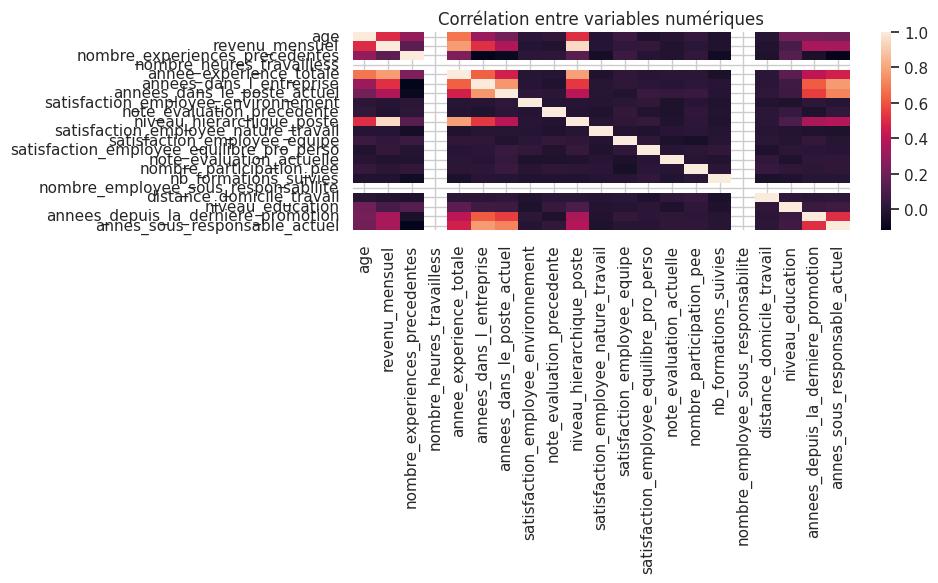

ANOVA revenu_mensuel ~ departement : p-value = 0.041

Test Chi² (genre × attrition) : p-value = 0.2906


In [13]:

# =================================================================
# 📈 CELLULE 9 – Statistiques descriptives, corrélations et tests
# =================================================================


from IPython.display import display, HTML

print("\n")

# === 🔎 1. Définir les colonnes à exclure (identifiants)
cols_to_exclude = ["id_employee", "eval_number", "code_sondage"]

# === 📊 2. Corrélation quantitative SANS les identifiants
num_cols = [
    col
    for col in df_central_left.select_dtypes(include=np.number).columns
    if col not in cols_to_exclude
]

corr = df_central_left[num_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=False)
plt.title("Corrélation entre variables numériques")
plt.tight_layout()
plt.savefig(os.path.join(FIGURES_DIR, "e01_heatmap_corr.png"))
plt.show()

display(HTML("<br><br>"))  # 👈 ajoute un espace vertical

# === 🧪 3. Test ANOVA : revenu_mensuel ~ departement (identifiants exclus automatiquement)
anova = stats.f_oneway(
    *[
        group["revenu_mensuel"].dropna()
        for _, group in df_central_left.groupby("departement")
    ]
)
print("ANOVA revenu_mensuel ~ departement : p-value =", round(anova.pvalue, 4))

# === 🔢 4. Chi² : attrition vs genre (identifiants non concernés)
df_central_left["a_quitte_l_entreprise_norm"] = (
    df_central_left["a_quitte_l_entreprise"].str.lower().map({"oui": 1, "non": 0})
)

cont = pd.crosstab(
    df_central_left["genre"],
    df_central_left["a_quitte_l_entreprise_norm"]
)

chi2, p, _, _ = stats.chi2_contingency(cont)
print("\nTest Chi² (genre × attrition) : p-value =", round(p, 4))


## **10. Visualisations clés**

Cette cellule a pour objectif de **représenter visuellement les distributions et relations principales** du jeu de données consolidé `df_central_left`.  
Les graphiques produits permettent d’appuyer les constats faits lors de l’analyse descriptive et statistique précédente.

---

### 🎯 Objectifs :
1️⃣ **Analyser la distribution de l’âge des employés**  
   - Utilisation d’un *histogramme* avec courbe de densité (*KDE*) pour observer la forme de la distribution (symétrie, dispersion, éventuels pics).  
   - Permet de détecter d’éventuels groupes d’âge dominants ou des populations atypiques.

2️⃣ **Comparer le revenu mensuel selon le poste occupé**  
   - Représentation par *boxplot* (boîte à moustaches).  
   - Objectif : visualiser les écarts de salaires, les médianes et les valeurs extrêmes selon les différents postes.  
   - Permet de repérer les postes mieux rémunérés ou avec forte dispersion salariale.

3️⃣ **Étudier le taux de départ par département**  
   - Diagramme en barres basé sur la moyenne de la variable binaire `a_quitte_l_entreprise_norm`.  
   - Objectif : identifier les départements avec un **taux d’attrition plus élevé** que la moyenne.  
   - Utile pour cibler les zones à risque en termes de rétention du personnel.

---

### 📊 Résultats attendus :
- Trois visualisations :
  - Distribution de l’âge (`e01_dist_age_attrition.png`)
  - Revenu mensuel par poste (`e01_revenu_poste_attrition.png`)
  - Taux de départ par département (`e01_attrition_dept_color.png`)
- Ces figures sont automatiquement enregistrées dans le dossier `FIGURES_DIR` pour réutilisation dans le rapport.


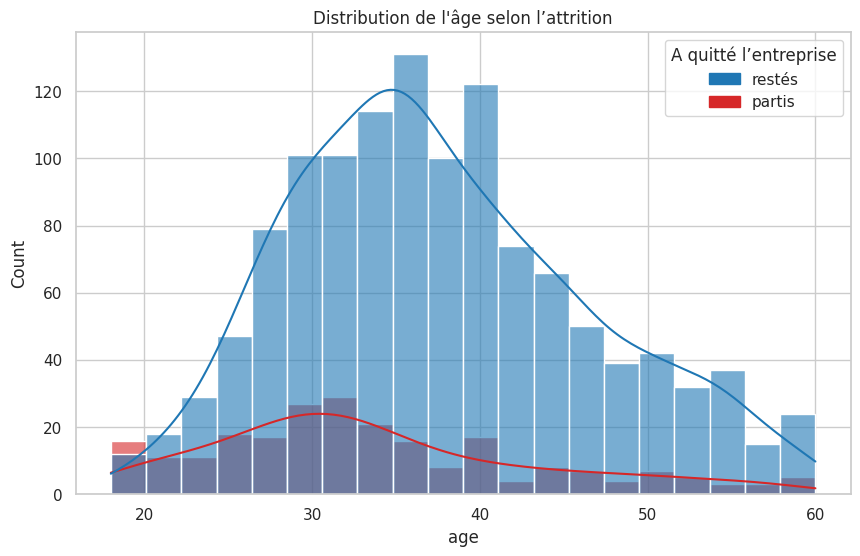

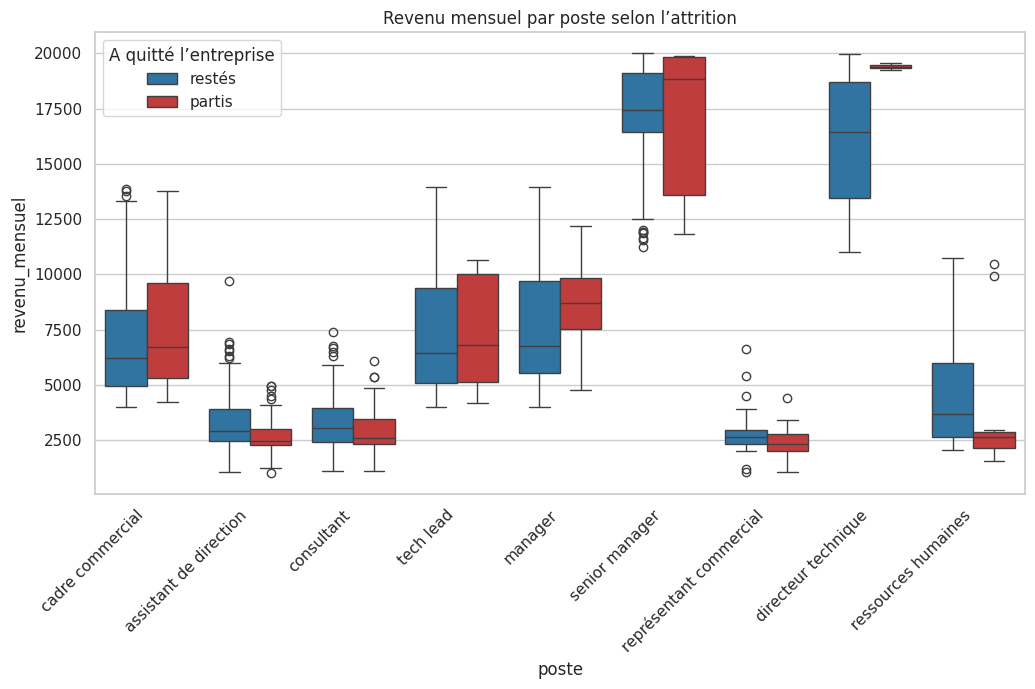

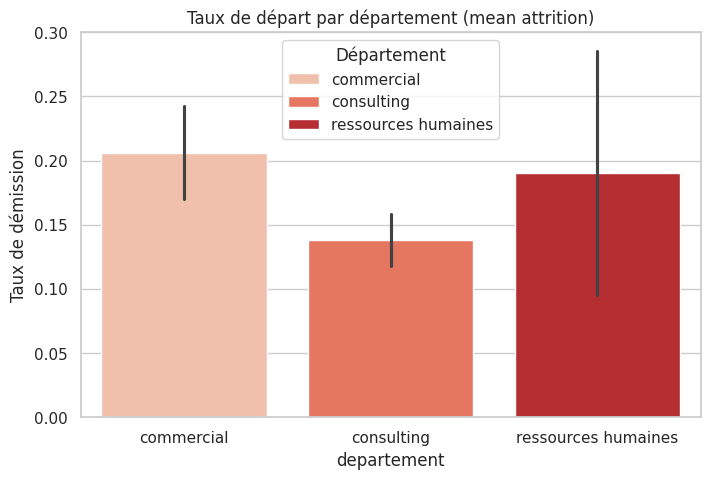

In [31]:

# =================================================================
# 📉 CELLULE 10 – Visualisations clés (version enrichie avec code couleur)
# =================================================================

from IPython.display import display, HTML
import matplotlib.patches as mpatches
import os

print("\n")

# Définition de la palette pour identifier restés (0) vs partis (1)
attrition_palette = {
    0: "#1f77b4",   # bleu = restés
    1: "#d62728"    # rouge = partis
}


# ============================================================
# 1️⃣ Distribution de l'âge selon attrition — AVEC LÉGENDE FIXÉE
# ============================================================

filename_1 = "e01_dist_age_attrition.png"
filepath_1 = os.path.join(FIGURES_DIR, filename_1)

plt.figure(figsize=(10,6))
ax = sns.histplot(
    data=df_central_left,
    x="age",
    hue="a_quitte_l_entreprise_norm",
    bins=20,
    kde=True,
    palette=attrition_palette,
    alpha=0.6,
    legend=False
)

plt.title("Distribution de l'âge selon l’attrition")

# --- Légende manuelle ---
restes_patch = mpatches.Patch(color=attrition_palette[0], label="restés")
partis_patch = mpatches.Patch(color=attrition_palette[1], label="partis")

plt.legend(
    handles=[restes_patch, partis_patch],
    title="A quitté l’entreprise"
)

plt.savefig(filepath_1)
plt.show()

# 🔎 Affichage du chemin du fichier PNG
display(HTML(f"<b>📁 Image sauvegardée :</b> {filepath_1}"))
display(HTML("<br><br>"))



# ============================================================
# 2️⃣ Revenu mensuel par poste (couleur = attrition) — CORRIGÉ
# ============================================================

filename_2 = "e01_revenu_poste_attrition.png"
filepath_2 = os.path.join(FIGURES_DIR, filename_2)

plt.figure(figsize=(12,6))
ax = sns.boxplot(
    x="poste",
    y="revenu_mensuel",
    hue="a_quitte_l_entreprise_norm",
    data=df_central_left,
    palette=attrition_palette
)

plt.xticks(rotation=45, ha='right')
plt.title("Revenu mensuel par poste selon l’attrition")

# --- Correction de la légende ---
handles, labels = ax.get_legend_handles_labels()
legends_map = {"0": "restés", "1": "partis"}
new_labels = [legends_map[l] for l in labels]

plt.legend(handles, new_labels, title="A quitté l’entreprise")

plt.savefig(filepath_2)
plt.show()

# 🔎 Affichage du chemin du fichier PNG
display(HTML(f"<b>📁 Image sauvegardée :</b> {filepath_2}"))
display(HTML("<br><br>"))



# ============================================================
# 3️⃣ Taux de départ par département (barplot colorisé)
# ============================================================

filename_3 = "e01_attrition_dept_color.png"
filepath_3 = os.path.join(FIGURES_DIR, filename_3)

plt.figure(figsize=(8,5))
ax = sns.barplot(
    x="departement",
    y="a_quitte_l_entreprise_norm",
    hue="departement",
    data=df_central_left,
    estimator=np.mean,
    palette="Reds",
    legend=True
)

plt.title("Taux de départ par département (mean attrition)")
plt.ylabel("Taux de démission")

plt.legend(title="Département")

plt.savefig(filepath_3)
plt.show()

# 🔎 Affichage du chemin du fichier PNG
display(HTML(f"<b>📁 Image sauvegardée :</b> {filepath_3}"))
display(HTML("<br><br>"))


## **11. Rapport automatique, sauvegarde & comparaison INNER vs LEFT**

Cette cellule a pour but de **centraliser et documenter la sauvegarde finale des jeux de données consolidés**, tout en **comparant les résultats entre les jointures INNER et LEFT**.  
Elle permet d’assurer la **traçabilité**, la **qualité** et la **cohérence statistique** avant les étapes de modélisation.

---

### 🎯 Objectifs :
1️⃣ **Sauvegarde des versions “raw” et “clean” des DataFrames de jointure**
   - Exportation des jeux de données fusionnés (`df_central_inner`, `df_central_left`) en CSV.  
   - Création de versions nettoyées et dédupliquées (`df_inner_clean`, `df_left_clean`) stockées dans le répertoire `DATA_PROCESSED_DIR`.

2️⃣ **Journalisation des effectifs**
   - Génération d’un journal (`join_summary_df`) retraçant le nombre d’identifiants uniques à chaque étape :  
     - Fichiers sources (`SIRH`, `EVAL`, `SONDAGE`)  
     - Fusions (`INNER`, `LEFT`)  
   - Permet de détecter des pertes ou doublons lors des opérations de jointure.

3️⃣ **Nettoyage complémentaire du jeu LEFT**
   - Ajout de variables indicatrices `present_in_eval` et `present_in_sondage` pour mesurer la couverture des données.  
   - Conversion de la variable cible `a_quitte_l_entreprise` en format binaire (`a_quitte_l_entreprise_norm`).

4️⃣ **Comparaison automatique INNER vs LEFT**
   - Calcul et affichage d’un tableau synthétique (`comparison_df`) incluant :
     - Nombre d’employés, âge moyen, salaire médian, ancienneté moyenne, taux d’attrition.  
     - Présence des données d’évaluation et de sondage.  
   - Une seconde table (`delta_df`) met en évidence les écarts en pourcentage entre les deux jeux.  
   - Interprétation automatique des résultats pour repérer d’éventuels biais ou manques de données.

---

### 📊 Résultats attendus :
- 4 fichiers sauvegardés :  
  - `e01_df_central_inner_raw.csv`  
  - `e01_df_central_left_raw.csv`  
  - `e01_df_central_inner_clean.csv`  
  - `e01_df_central_left_clean.csv`
- 1 journal des effectifs : `e01_join_summary.csv`
- 2 tableaux de synthèse affichés :  
  - `comparison_df` (statistiques clés)  
  - `delta_df` (écarts relatifs)
- Interprétation automatique des écarts majeurs (âge, salaire, taux d’attrition).


In [19]:

# =================================================================
# 📄 CELLULE 11 : Rapport automatique, sauvegarde & comparaison INNER vs LEFT
# =================================================================


# --- Définition des chemins de sortie ---
raw_inner_path    = os.path.join(DATA_PROCESSED_DIR, "e01_df_central_inner_raw.csv")
raw_left_path     = os.path.join(DATA_PROCESSED_DIR, "e01_df_central_left_raw.csv")
clean_inner_path  = os.path.join(DATA_PROCESSED_DIR, "e01_df_central_inner_clean.csv")
clean_left_path   = os.path.join(DATA_PROCESSED_DIR, "e01_df_central_left_clean.csv")
join_log_path     = os.path.join(DATA_PROCESSED_DIR, "e01_join_summary.csv")

# =====================================================
# 1️⃣ Sauvegarde brute (raw) des deux DataFrames
# =====================================================
df_central_inner.to_csv(raw_inner_path, index=False)
print(f"💾 df_central_inner sauvegardé : {raw_inner_path}")

df_central_left.to_csv(raw_left_path, index=False)
print(f"💾 df_central_left sauvegardé : {raw_left_path}")

# =====================================================
# 2️⃣ Journalisation des effectifs des jointures
# =====================================================
join_summary = {
    "stage": ["sirh_total", "eval_total", "sondage_total", "inner_join", "left_join"],
    "nb_ids": [
        df_sirh['id_employee'].nunique(),
        df_eval['id_employee'].nunique(),
        df_sondage['id_employee'].nunique(),
        df_central_inner['id_employee'].nunique(),
        df_central_left['id_employee'].nunique()
    ]
}
join_summary_df = pd.DataFrame(join_summary)
join_summary_df.to_csv(join_log_path, index=False)
print(f"💾 Journal de jointure sauvegardé : {join_log_path}")
display(join_summary_df)

# =====================================================
# 3️⃣ Création version CLEAN (INNER & LEFT)
# =====================================================
## --- INNER CLEAN ---
df_inner_clean = df_central_inner.drop_duplicates(subset='id_employee').copy()
df_inner_clean.to_csv(clean_inner_path, index=False)
print(f"💾 df_central_inner_clean sauvegardé : {clean_inner_path}")

## --- LEFT CLEAN ---
df_left = df_central_left.copy()
df_left['present_in_eval'] = ~df_left['eval_number'].isna()
df_left['present_in_sondage'] = ~df_left['a_quitte_l_entreprise'].isna()

# Normalisation de la cible a_quitte_l_entreprise → binaire
if 'a_quitte_l_entreprise' in df_left.columns:
    df_left['a_quitte_l_entreprise_norm'] = (
        df_left['a_quitte_l_entreprise']
        .astype(str)
        .str.strip()
        .str.lower()
        .map({'oui': 1, 'non': 0})
    )

df_left_clean = df_left.drop_duplicates(subset='id_employee').copy()
df_left_clean.to_csv(clean_left_path, index=False)
print(f"💾 df_central_left_clean sauvegardé : {clean_left_path}")

# =====================================================
# 4️⃣ Comparaison automatique INNER vs LEFT
# =====================================================
print("\n📊 Comparaison automatique INNER vs LEFT (analyse de biais possible)")

def quick_stats(df, label):
    """Retourne les indicateurs clés pour un DataFrame"""
    out = {
        "Source": label,
        "Nb_employés": df['id_employee'].nunique(),
        "Âge_moyen": df['age'].mean() if 'age' in df.columns else None,
        "Salaire_médian": df['revenu_mensuel'].median() if 'revenu_mensuel' in df.columns else None,
        "Ancienneté_moyenne": df['annees_dans_l_entreprise'].mean() if 'annees_dans_l_entreprise' in df.columns else None,
        "Taux_attrition (%)": (
            df['a_quitte_l_entreprise_norm'].mean() * 100
            if 'a_quitte_l_entreprise_norm' in df.columns else None
        ),
        "Présence_eval (%)": df['present_in_eval'].mean() * 100 if 'present_in_eval' in df.columns else 100,
        "Présence_sondage (%)": df['present_in_sondage'].mean() * 100 if 'present_in_sondage' in df.columns else 100,
    }
    return out

inner_stats = quick_stats(df_inner_clean, "INNER join")
left_stats = quick_stats(df_left_clean, "LEFT join")

comparison_df = pd.DataFrame([inner_stats, left_stats])
display(comparison_df)

delta_df = comparison_df.copy()
delta_df.loc[1, "Δ employés (%)"] = (
    (comparison_df.loc[1, "Nb_employés"] - comparison_df.loc[0, "Nb_employés"])
    / comparison_df.loc[0, "Nb_employés"] * 100
)
print("\n📈 Résumé des différences principales :")
display(delta_df)

print("💡 Interprétation :")
print("- Si le nombre d’employés LEFT > INNER, cela indique des absences de données dans les autres sources.")
print("- Un écart fort (>5%) sur l’âge ou le salaire peut indiquer un biais d’échantillonnage (ex : les plus récents sans évaluation).")
print("- Le taux d’attrition diffère ? Cela suggère que les départs sont sous-représentés dans certaines sources (ex : sondage manquant).")


💾 df_central_inner sauvegardé : /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/data/processed/e01_df_central_inner_raw.csv
💾 df_central_left sauvegardé : /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/data/processed/e01_df_central_left_raw.csv
💾 Journal de jointure sauvegardé : /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/data/processed/e01_join_summary.csv


,stage,nb_ids
0,sirh_total,1470
1,eval_total,1470
2,sondage_total,1470
3,inner_join,1470
4,left_join,1470


💾 df_central_inner_clean sauvegardé : /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/data/processed/e01_df_central_inner_clean.csv
💾 df_central_left_clean sauvegardé : /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/data/processed/e01_df_central_left_clean.csv

📊 Comparaison automatique INNER vs LEFT (analyse de biais possible)


,Source,Nb_employés,Âge_moyen,Salaire_médian,Ancienneté_moyenne,Taux_attrition (%),Présence_eval (%),Présence_sondage (%)
0,INNER join,1470,36.92381,4919.0,7.008163,NaN,100.0,100.0
1,LEFT join,1470,36.92381,4919.0,7.008163,16.122449,100.0,100.0



📈 Résumé des différences principales :


,Source,Nb_employés,Âge_moyen,Salaire_médian,Ancienneté_moyenne,Taux_attrition (%),Présence_eval (%),Présence_sondage (%),Δ employés (%)
0,INNER join,1470,36.92381,4919.0,7.008163,NaN,100.0,100.0,NaN
1,LEFT join,1470,36.92381,4919.0,7.008163,16.122449,100.0,100.0,0.0


💡 Interprétation :
- Si le nombre d’employés LEFT > INNER, cela indique des absences de données dans les autres sources.
- Un écart fort (>5%) sur l’âge ou le salaire peut indiquer un biais d’échantillonnage (ex : les plus récents sans évaluation).
- Le taux d’attrition diffère ? Cela suggère que les départs sont sous-représentés dans certaines sources (ex : sondage manquant).


## **12. Vérification et gestion des fichiers dans Google Drive**

Cette cellule a pour objectif de **vérifier la présence des fichiers de données nettoyés** dans le dossier de travail du projet (`/data/processed`).  
Elle automatise également la **procédure de téléversement (upload)** si certains fichiers sont manquants.

### 🔍 Fonctionnalités principales :
1. **Définition du répertoire cible** dans Google Drive (`DATA_PROCESSED_DIR`).
2. **Vérification automatique** de l’existence des fichiers attendus :
   - `e01_df_central_inner_clean.csv`
   - `e01_df_central_left_clean.csv`
3. **Téléversement automatique** depuis l’ordinateur local si les fichiers sont absents :
   - Une fenêtre d’upload s’ouvre pour permettre d’ajouter les fichiers manquants.
   - Les fichiers uploadés sont sauvegardés dans le bon dossier (`data/processed`).
4. **Re-vérification finale** après upload pour confirmer que tous les fichiers requis sont disponibles.

### ✅ Résultat attendu :
- Si tous les fichiers existent déjà → message de confirmation “Tous les fichiers sont déjà présents”.
- Si un ou plusieurs fichiers manquent → ouverture automatique du sélecteur d’upload.
- Si après upload les fichiers sont toujours absents → levée d’une erreur `FileNotFoundError`.

Cette cellule garantit que les **fichiers nettoyés nécessaires aux étapes suivantes** du projet sont bien présents avant toute analyse complémentaire.


In [20]:

# =================================================================
# 📄 CELLULE 12 - Vérifier si les fichiers existent dans Drive ; sinon proposer upload depuis le PC
# =================================================================


import os
from google.colab import files
import shutil


# Chemin cible (modifie si tu veux un autre emplacement)
DATA_PROCESSED_DIR = os.path.join(PROJECT_DIR, "data", "processed")
print("Chemin cible :", DATA_PROCESSED_DIR)

#  = "/content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/data/processed/"
# print("Chemin cible :", DRIVE_BASE)

# Noms des fichiers recherchés
files_needed = [
    "e01_df_central_inner_clean.csv",
    "e01_df_central_left_clean.csv"
]

# Assure l'existence du dossier (le créer si besoin)
os.makedirs(DATA_PROCESSED_DIR, exist_ok=True)
# os.makedirs(DRIVE_BASE, exist_ok=True)

missing = [f for f in files_needed if not os.path.exists(os.path.join(DATA_PROCESSED_DIR, f))]
# missing = [f for f in files_needed if not os.path.exists(os.path.join(DRIVE_BASE, f))]
print("Fichiers manquants :", missing)

if missing:
    print("\nTéléverse les fichiers manquants depuis ton PC (fenêtre d'upload).")
    uploaded = files.upload()  # ouvrira un sélecteur local
    # uploaded est un dict : {filename: bytes}
    for name in uploaded.keys():
        target = os.path.join(DATA_PROCESSED_DIR, name)
        # target = os.path.join(DRIVE_BASE, name)
        # Sauvegarde le fichier uploadé vers le dossier DRIVE_BASE
        with open(target, "wb") as f:
            f.write(uploaded[name])
        print(f"→ Fichier '{name}' sauvegardé dans : {target}")

    # Re-vérification
    missing = [f for f in files_needed if not os.path.exists(os.path.join(DATA_PROCESSED_DIR, f))]
    # missing = [f for f in files_needed if not os.path.exists(os.path.join(DRIVE_BASE, f))]
    if missing:
        raise FileNotFoundError(f"Après upload, ces fichiers sont toujours manquants : {missing}")
    else:
        print("Tous les fichiers requis sont présents dans le dossier Drive.")
else:
    print("Tous les fichiers sont déjà présents : aucune action nécessaire.")


Chemin cible : /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/data/processed
Fichiers manquants : []
Tous les fichiers sont déjà présents : aucune action nécessaire.


## **13. Imports des librairies et définition des fonctions réutilisables**

Cette cellule prépare l’environnement d’analyse en **important les librairies essentielles**, en **définissant les chemins vers les fichiers de données nettoyés**, et en **créant des fonctions d’aide (helpers)** pour faciliter l’exploration des DataFrames.

---

### 📦 **1. Imports des librairies principales**
- **pandas / numpy** → manipulation et analyse de données tabulaires.  
- **matplotlib / seaborn** → visualisation graphique et statistique.  
- **scipy / sklearn** → outils pour analyses statistiques et modèles simples (corrélations, régressions, splits).  
- **pathlib / os** → gestion des chemins de fichiers.  

---

### ⚙️ **2. Configuration des options d’affichage**
- Ajuste le nombre de colonnes et lignes affichées dans les sorties pandas.
- Définit un style visuel homogène pour les graphiques (`whitegrid` de Seaborn).
- Met en place un format de figures par défaut `(10, 6)` pour les graphiques Matplotlib.

---

### 📁 **3. Définition des chemins d’accès aux fichiers**
Les chemins pointent vers les fichiers nettoyés produits lors des étapes précédentes :
- `e01_df_central_inner_clean.csv`
- `e01_df_central_left_clean.csv`

Ces fichiers sont stockés dans le répertoire :
> `DATA_PROCESSED_DIR` (souvent `/content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/data/processed/`)

---

### 🧩 **4. Fonction utilitaire : `aperçu(df, name, n=5)`**
Cette fonction permet d’obtenir un **résumé rapide et structuré** d’un DataFrame :
- Affiche les premières lignes (`head(n)`)
- Taille du dataset (`shape`)
- Types de variables (`dtypes`)
- Colonnes contenant des valeurs manquantes
- Statistiques descriptives (`describe()`)

Cette fonction sera utilisée à plusieurs reprises pour **explorer et documenter visuellement** les différents jeux de données lors des étapes d’analyse exploratoire.


In [21]:

# =================================================================
# 📄 CELLULE 13 - Imports et fonctions réutilisables
# =================================================================


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

# Paramètres d'affichage
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 100)
plt.rcParams['figure.figsize'] = (10, 6)
sns.set(style="whitegrid")

# Chemins
path_inner = os.path.join(DATA_PROCESSED_DIR, "e01_df_central_inner_clean.csv")
path_left  = os.path.join(DATA_PROCESSED_DIR, "e01_df_central_left_clean.csv")

# path_inner = os.path.join(DRIVE_BASE, "e01_df_central_inner_clean.csv")
# path_left  = os.path.join(DRIVE_BASE, "e01_df_central_left_clean.csv")

# Petit helper pour afficher des distributions basiques
def aperçu(df, name, n=5):
    print(f"--- Aperçu : {name} ---")
    display(df.head(n))
    print("\nShape :", df.shape)
    print("\nDtypes :")
    print(df.dtypes)
    print("\nValeurs manquantes par colonne :")
    print(df.isna().sum()[lambda x: x>0].sort_values(ascending=False))
    print("\nStatistiques numériques rapides :")
    display(df.describe().T)


## **14. Chargement des fichiers nettoyés en DataFrame pandas**

Cette cellule a pour objectif de **charger les fichiers nettoyés** produits précédemment  
(`e01_df_central_inner_clean.csv` et `e01_df_central_left_clean.csv`) dans des **DataFrames pandas** afin de poursuivre l’analyse exploratoire ou la modélisation.

---

### 📂 **1. Chargement des fichiers CSV**
Les fichiers sont lus à partir des chemins définis dans la cellule précédente (`path_inner` et `path_left`) :
- `df_inner` → correspond à la version *INNER JOIN* du jeu de données, contenant uniquement les employés présents dans toutes les sources.  
- `df_left` → correspond à la version *LEFT JOIN*, incluant tous les employés, même ceux avec des valeurs manquantes dans certaines sources.

---

### 🔍 **2. Aperçu rapide du contenu**
Pour chacun des deux DataFrames, la fonction `aperçu()` (définie dans la cellule 13) est utilisée afin d’afficher :
- Les premières lignes du jeu de données  
- Les dimensions du tableau  
- Les types de variables  
- Les colonnes contenant des valeurs manquantes  
- Les statistiques descriptives principales  

Cela permet de **vérifier rapidement la qualité et la structure** des fichiers chargés.

---

### 🧩 **3. Vérification de la cohérence des identifiants**
Un petit test automatisé compare la présence et la cohérence des colonnes d’identifiants entre les deux DataFrames :
- Si la colonne `id_employee` (ou variante `id` / `employee_id`) existe dans les deux fichiers,  
  une comparaison est effectuée pour vérifier si les identifiants sont dans le **même ordre et avec les mêmes valeurs**.  
- Sinon, un message d’avertissement indique qu’aucune colonne d’identifiant standard n’a été trouvée.

---

✅ **Objectif final :**
Confirmer que les fichiers nettoyés sont **cohérents, complets et prêts** pour les étapes d’analyse statistique ou de modélisation supervisée.


In [22]:

# =================================================================
# 📄 CELLULE 14 - Charger les fichiers en DataFrame pandas
# =================================================================


df_inner = pd.read_csv(path_inner)
df_left  = pd.read_csv(path_left)

# Aperçus rapides
aperçu(df_inner, "e01_df_central_inner_clean.csv")
aperçu(df_left, "e01_df_central_left_clean.csv")

# Vérifier que les id_employee (ou identifiant) correspondent si présents
id_col_candidates = ["id_employee", "id", "employee_id"]
for col in id_col_candidates:
    if col in df_inner.columns and col in df_left.columns:
        print(f"Comparaison des identifiants par colonne '{col}':")
        same_ids = df_inner[col].equals(df_left[col])
        print("→ mêmes ordres et mêmes valeurs :", same_ids)
        break
else:
    print("Aucun identifiant standard trouvé dans les deux fichiers (vérifie le nom de colonne).")


--- Aperçu : e01_df_central_inner_clean.csv ---


,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,nombre_heures_travailless,annee_experience_totale,annees_dans_l_entreprise,annees_dans_le_poste_actuel,satisfaction_employee_environnement,note_evaluation_precedente,niveau_hierarchique_poste,satisfaction_employee_nature_travail,satisfaction_employee_equipe,satisfaction_employee_equilibre_pro_perso,eval_number,note_evaluation_actuelle,heure_supplementaires,augementation_salaire_precedente,a_quitte_l_entreprise,nombre_participation_pee,nb_formations_suivies,nombre_employee_sous_responsabilite,distance_domicile_travail,niveau_education,domaine_etude,ayant_enfants,frequence_deplacement,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel
0,1,41,f,5993,célibataire,commercial,cadre commercial,8,80,8,6,4,2,3,2,4,1,1,E_1,3,oui,11 %,oui,0,0,1,1,2,infra & cloud,y,occasionnel,0,5
1,2,49,m,5130,marié(e),consulting,assistant de direction,1,80,10,10,7,3,2,2,2,4,3,E_2,4,non,23 %,non,1,3,1,8,1,infra & cloud,y,frequent,1,7
2,4,37,m,2090,célibataire,consulting,consultant,6,80,7,0,0,4,2,1,3,2,3,E_4,3,oui,15 %,oui,0,3,1,2,2,autre,y,occasionnel,0,0
3,5,33,f,2909,marié(e),consulting,assistant de direction,1,80,8,8,7,4,3,1,3,3,3,E_5,3,oui,11 %,non,0,3,1,3,4,infra & cloud,y,frequent,3,0
4,7,27,m,3468,marié(e),consulting,consultant,9,80,6,2,2,1,3,1,2,4,3,E_7,3,non,12 %,non,1,3,1,2,1,transformation digitale,y,occasionnel,2,2



Shape : (1470, 33)

Dtypes :
id_employee                                   int64
age                                           int64
genre                                        object
revenu_mensuel                                int64
statut_marital                               object
departement                                  object
poste                                        object
nombre_experiences_precedentes                int64
nombre_heures_travailless                     int64
annee_experience_totale                       int64
annees_dans_l_entreprise                      int64
annees_dans_le_poste_actuel                   int64
satisfaction_employee_environnement           int64
note_evaluation_precedente                    int64
niveau_hierarchique_poste                     int64
satisfaction_employee_nature_travail          int64
satisfaction_employee_equipe                  int64
satisfaction_employee_equilibre_pro_perso     int64
eval_number                       

,count,mean,std,min,25%,50%,75%,max
id_employee,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
revenu_mensuel,1470.0,6502.931293,4707.956783,1009.0,2911.00,4919.0,8379.00,19999.0
nombre_experiences_precedentes,1470.0,2.693197,2.498009,0.0,1.00,2.0,4.00,9.0
nombre_heures_travailless,1470.0,80.000000,0.000000,80.0,80.00,80.0,80.00,80.0
annee_experience_totale,1470.0,11.279592,7.780782,0.0,6.00,10.0,15.00,40.0
annees_dans_l_entreprise,1470.0,7.008163,6.126525,0.0,3.00,5.0,9.00,40.0
annees_dans_le_poste_actuel,1470.0,4.229252,3.623137,0.0,2.00,3.0,7.00,18.0
satisfaction_employee_environnement,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
note_evaluation_precedente,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0


--- Aperçu : e01_df_central_left_clean.csv ---


,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,nombre_heures_travailless,annee_experience_totale,annees_dans_l_entreprise,annees_dans_le_poste_actuel,satisfaction_employee_environnement,note_evaluation_precedente,niveau_hierarchique_poste,satisfaction_employee_nature_travail,satisfaction_employee_equipe,satisfaction_employee_equilibre_pro_perso,eval_number,note_evaluation_actuelle,heure_supplementaires,augementation_salaire_precedente,a_quitte_l_entreprise,nombre_participation_pee,nb_formations_suivies,nombre_employee_sous_responsabilite,distance_domicile_travail,niveau_education,domaine_etude,ayant_enfants,frequence_deplacement,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel,a_quitte_l_entreprise_norm,present_in_eval,present_in_sondage
0,1,41,f,5993,célibataire,commercial,cadre commercial,8,80,8,6,4,2,3,2,4,1,1,E_1,3,oui,11 %,oui,0,0,1,1,2,infra & cloud,y,occasionnel,0,5,1,True,True
1,2,49,m,5130,marié(e),consulting,assistant de direction,1,80,10,10,7,3,2,2,2,4,3,E_2,4,non,23 %,non,1,3,1,8,1,infra & cloud,y,frequent,1,7,0,True,True
2,4,37,m,2090,célibataire,consulting,consultant,6,80,7,0,0,4,2,1,3,2,3,E_4,3,oui,15 %,oui,0,3,1,2,2,autre,y,occasionnel,0,0,1,True,True
3,5,33,f,2909,marié(e),consulting,assistant de direction,1,80,8,8,7,4,3,1,3,3,3,E_5,3,oui,11 %,non,0,3,1,3,4,infra & cloud,y,frequent,3,0,0,True,True
4,7,27,m,3468,marié(e),consulting,consultant,9,80,6,2,2,1,3,1,2,4,3,E_7,3,non,12 %,non,1,3,1,2,1,transformation digitale,y,occasionnel,2,2,0,True,True



Shape : (1470, 36)

Dtypes :
id_employee                                   int64
age                                           int64
genre                                        object
revenu_mensuel                                int64
statut_marital                               object
departement                                  object
poste                                        object
nombre_experiences_precedentes                int64
nombre_heures_travailless                     int64
annee_experience_totale                       int64
annees_dans_l_entreprise                      int64
annees_dans_le_poste_actuel                   int64
satisfaction_employee_environnement           int64
note_evaluation_precedente                    int64
niveau_hierarchique_poste                     int64
satisfaction_employee_nature_travail          int64
satisfaction_employee_equipe                  int64
satisfaction_employee_equilibre_pro_perso     int64
eval_number                       

,count,mean,std,min,25%,50%,75%,max
id_employee,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
revenu_mensuel,1470.0,6502.931293,4707.956783,1009.0,2911.00,4919.0,8379.00,19999.0
nombre_experiences_precedentes,1470.0,2.693197,2.498009,0.0,1.00,2.0,4.00,9.0
nombre_heures_travailless,1470.0,80.000000,0.000000,80.0,80.00,80.0,80.00,80.0
annee_experience_totale,1470.0,11.279592,7.780782,0.0,6.00,10.0,15.00,40.0
annees_dans_l_entreprise,1470.0,7.008163,6.126525,0.0,3.00,5.0,9.00,40.0
annees_dans_le_poste_actuel,1470.0,4.229252,3.623137,0.0,2.00,3.0,7.00,18.0
satisfaction_employee_environnement,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
note_evaluation_precedente,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0


Comparaison des identifiants par colonne 'id_employee':
→ mêmes ordres et mêmes valeurs : True


## **15. Comparaison des structures entre `df_inner` et `df_left`**

Cette cellule a pour objectif de **comparer la structure des deux jeux de données nettoyés**,  
afin d’identifier les **colonnes communes** et celles **présentes uniquement** dans l’un ou l’autre des DataFrames.  
Cela permet de vérifier la cohérence des étapes de jointure réalisées précédemment (INNER vs LEFT).

---

### 🧩 **1. Constitution des ensembles de colonnes**
- `cols_inner` : ensemble des noms de colonnes du DataFrame `df_inner` (issu du INNER JOIN).  
- `cols_left` : ensemble des noms de colonnes du DataFrame `df_left` (issu du LEFT JOIN).

Ces ensembles permettent une comparaison rapide et fiable de la structure des deux jeux de données.

---

### 📊 **2. Comparaisons réalisées**
- **Colonnes communes** : `cols_inner & cols_left`  
  → Permet d’identifier les variables présentes dans les deux tables.  
- **Colonnes uniquement dans INNER** : `cols_inner - cols_left`  
  → Variables présentes dans `df_inner` mais absentes dans `df_left`.  
- **Colonnes uniquement dans LEFT** : `cols_left - cols_inner`  
  → Variables présentes dans `df_left` mais absentes dans `df_inner`.

---

### 🧠 **3. Interprétation**
- Si la majorité des colonnes sont communes, cela confirme que la jointure et le nettoyage sont cohérents.  
- Les différences peuvent révéler :
  - Des variables calculées ou ajoutées uniquement dans une version.  
  - Des colonnes perdues lors d’une jointure ou d’un nettoyage.  
  - Des différences de structure nécessitant harmonisation avant modélisation.

---

✅ **Objectif final :**
S’assurer que les structures des jeux de données **INNER** et **LEFT** sont **compatibles et cohérentes**,  
avant de poursuivre vers l’analyse descriptive ou la modélisation prédictive.


In [23]:

# =================================================================
# 📄 CELLULE 15 - Colonnes communes / différentes entre les deux DataFrames
# Comparaison structurelle & colonnes manquantes / supplémentaires
# =================================================================


cols_inner = set(df_inner.columns)
cols_left  = set(df_left.columns)

print("Nombre colonnes inner :", len(cols_inner))
print("Nombre colonnes left  :", len(cols_left))

cols_communes = cols_inner & cols_left
cols_only_inner = cols_inner - cols_left
cols_only_left  = cols_left - cols_inner

print("\nColonnes communes (extraits) :", list(cols_communes)[:20])
print("\nColonnes seulement dans inner :", cols_only_inner)
print("\nColonnes seulement dans left  :", cols_only_left)


Nombre colonnes inner : 33
Nombre colonnes left  : 36

Colonnes communes (extraits) : ['satisfaction_employee_equilibre_pro_perso', 'nombre_participation_pee', 'domaine_etude', 'nombre_heures_travailless', 'eval_number', 'revenu_mensuel', 'nb_formations_suivies', 'annee_experience_totale', 'ayant_enfants', 'distance_domicile_travail', 'satisfaction_employee_equipe', 'note_evaluation_actuelle', 'niveau_education', 'departement', 'genre', 'annees_dans_le_poste_actuel', 'annees_depuis_la_derniere_promotion', 'niveau_hierarchique_poste', 'satisfaction_employee_nature_travail', 'annees_dans_l_entreprise']

Colonnes seulement dans inner : set()

Colonnes seulement dans left  : {'a_quitte_l_entreprise_norm', 'present_in_sondage', 'present_in_eval'}


## **16. Normalisation et renommage des colonnes**

Cette cellule a pour objectif de **préparer les noms de colonnes** pour la suite du pipeline de traitement.  
Elle applique une **normalisation systématique** des noms afin d’assurer :
- la **cohérence syntaxique** (mêmes conventions de nommage pour tous les fichiers),  
- la **compatibilité avec les librairies Python** (éviter les espaces, accents, caractères spéciaux),  
- la **lisibilité et maintenabilité** du code pour les prochaines étapes (analyse, modélisation, export).

---

### 🧩 **1. Fonction `normalize_cols(df)`**
Cette fonction reçoit un DataFrame et renvoie une version identique avec des **colonnes renommées** selon les règles suivantes :

| Type de modification | Exemple | Objectif |
|----------------------|----------|-----------|
| Conversion en minuscules | `Nom Employé` → `nom employe` | Uniformiser |
| Remplacement des espaces / tirets | `nom-employe` → `nom_employe` | Convention snake_case |
| Suppression des accents | `évaluation` → `evaluation` | Compatibilité ASCII |
| Correction manuelle | `nombre_heures_travailless` → `nombre_heures_travaillees` | Corriger erreurs typographiques courantes |

---

### 🧠 **2. Application de la fonction**
- `df_inner` et `df_left` sont normalisés indépendamment.  
- Les nouveaux noms de colonnes sont ensuite affichés (extrait limité à 30 premières colonnes).

---

### ✅ **3. Objectif final**
Garantir des noms de colonnes **propres, cohérents et sans ambiguïté**,  
avant la mise en place du pipeline de transformation ou de modélisation.


In [24]:

# =================================================================
# 📄 CELLULE 16 - Normaliser/renommer colonnes pour pipeline (exemples, ajuste si besoin)
# Préparation : normaliser noms de colonnes (snake_case) et corriger typos courantes
# =================================================================


def normalize_cols(df):
    df = df.copy()
    new_cols = {}
    for c in df.columns:
        cn = c.strip().lower().replace(" ", "_").replace("-", "_")
        cn = cn.replace("é","e").replace("è","e").replace("à","a").replace("ç","c").replace("ô","o")
        # correction manuelle courante
        cn = cn.replace("nombre_heures_travailless", "nombre_heures_travaillees")
        new_cols[c] = cn
    df.rename(columns=new_cols, inplace=True)
    return df

df_inner = normalize_cols(df_inner)
df_left  = normalize_cols(df_left)

print("Colonnes normalisées (inner) :", df_inner.columns.tolist()[:30])
print("Colonnes normalisées (left)  :", df_left.columns.tolist()[:30])


Colonnes normalisées (inner) : ['id_employee', 'age', 'genre', 'revenu_mensuel', 'statut_marital', 'departement', 'poste', 'nombre_experiences_precedentes', 'nombre_heures_travaillees', 'annee_experience_totale', 'annees_dans_l_entreprise', 'annees_dans_le_poste_actuel', 'satisfaction_employee_environnement', 'note_evaluation_precedente', 'niveau_hierarchique_poste', 'satisfaction_employee_nature_travail', 'satisfaction_employee_equipe', 'satisfaction_employee_equilibre_pro_perso', 'eval_number', 'note_evaluation_actuelle', 'heure_supplementaires', 'augementation_salaire_precedente', 'a_quitte_l_entreprise', 'nombre_participation_pee', 'nb_formations_suivies', 'nombre_employee_sous_responsabilite', 'distance_domicile_travail', 'niveau_education', 'domaine_etude', 'ayant_enfants']
Colonnes normalisées (left)  : ['id_employee', 'age', 'genre', 'revenu_mensuel', 'statut_marital', 'departement', 'poste', 'nombre_experiences_precedentes', 'nombre_heures_travaillees', 'annee_experience_total

## **17. Détection automatique des types de variables**

Cette cellule a pour but d’**identifier automatiquement les types de variables** dans les DataFrames (`df_inner` et `df_left`) afin de préparer les étapes suivantes du pipeline (analyse statistique, visualisation, modélisation).  

---

### 🎯 **Objectif**
Classer chaque colonne du jeu de données dans l’une des catégories suivantes :

| Type de variable | Description | Exemple |
|------------------|--------------|----------|
| **Quantitatives (quanti)** | Variables numériques continues (ex. salaire, âge) | `revenu`, `taux_absence` |
| **Discrètes (discrete)** | Variables numériques entières avec peu de modalités | `nombre_enfants`, `nombre_heures_travaillees` |
| **Qualitatives (quali)** | Variables catégorielles nominales (textes ou labels) | `sexe`, `poste`, `service` |
| **Ordinales (ordinal)** | Variables qualitatives ordonnées (ex. niveaux, grades) | `niveau_etude`, `satisfaction` |

---

### ⚙️ **1. Fonction `detect_var_types(df)`**
- Parcourt toutes les colonnes d’un DataFrame.
- Détermine le **type de données** (numérique ou non) grâce à `pandas.api.types`.
- Classe automatiquement selon :
  - Le **type de variable (int, float, object)**.
  - Le **nombre de valeurs uniques** (`nunique`).
- Une limite (`max_unique_cat`, par défaut = 20) est utilisée pour distinguer les variables **catégorielles** des **numériques continues**.

---

### 🧩 **2. Application de la fonction**
- Appliquée aux deux DataFrames : `df_inner` et `df_left`.
- Retourne un dictionnaire contenant la liste des variables par type :
  ```python
  {
      "quanti": [...],
      "discrete": [...],
      "quali": [...],
      "ordinal": [...]
  }


In [25]:

# =================================================================
# 📄 CELLULE 17 - Définir automatiquement types de variables (quantitatives / qualitatives / ordinales / discrètes)
# =================================================================


def detect_var_types(df, max_unique_cat=20):
    quanti = []  # quantitatives (numériques)
    quali = []   # qualitatives (catégoriques nominales)
    ordinal = [] # qualitatives ordinales (détectées heuristiquement)
    discrete = [] # quantitatives discrètes (entiers avec peu de valeurs uniques)
    for c in df.columns:
        if pd.api.types.is_numeric_dtype(df[c]):
            # si c'est int ou peu de modalités -> discret
            nunique = df[c].nunique(dropna=True)
            if pd.api.types.is_integer_dtype(df[c]) and nunique <= max_unique_cat:
                discrete.append(c)
            else:
                quanti.append(c)
        else:
            nunique = df[c].nunique(dropna=True)
            if nunique <= max_unique_cat:
                quali.append(c)
            else:
                quali.append(c)  # grandes catégories aussi qualitatives
    return {"quanti": quanti, "discrete": discrete, "quali": quali, "ordinal": ordinal}

types_inner = detect_var_types(df_inner)
types_left  = detect_var_types(df_left)

print("Types (inner) :", {k: len(v) for k,v in types_inner.items()})
print("Types (left)  :", {k: len(v) for k,v in types_left.items()})

# Affiche exemples
print("\nExemples quantitatives (inner) :", types_inner['quanti'][:10])
print("Exemples qualitatives (inner)  :", types_inner['quali'][:10])

print("\nExemples quantitatives (left) :", types_left['quanti'][:10])
print("Exemples qualitatives (left)  :", types_left['quali'][:10])


Types (inner) : {'quanti': 6, 'discrete': 16, 'quali': 11, 'ordinal': 0}
Types (left)  : {'quanti': 8, 'discrete': 17, 'quali': 11, 'ordinal': 0}

Exemples quantitatives (inner) : ['id_employee', 'age', 'revenu_mensuel', 'annee_experience_totale', 'annees_dans_l_entreprise', 'distance_domicile_travail']
Exemples qualitatives (inner)  : ['genre', 'statut_marital', 'departement', 'poste', 'eval_number', 'heure_supplementaires', 'augementation_salaire_precedente', 'a_quitte_l_entreprise', 'domaine_etude', 'ayant_enfants']

Exemples quantitatives (left) : ['id_employee', 'age', 'revenu_mensuel', 'annee_experience_totale', 'annees_dans_l_entreprise', 'distance_domicile_travail', 'present_in_eval', 'present_in_sondage']
Exemples qualitatives (left)  : ['genre', 'statut_marital', 'departement', 'poste', 'eval_number', 'heure_supplementaires', 'augementation_salaire_precedente', 'a_quitte_l_entreprise', 'domaine_etude', 'ayant_enfants']


## **18. Statistiques descriptives univariées (quantitatives & qualitatives)**

Cette cellule réalise une **analyse descriptive univariée** sur les variables des DataFrames `df_inner` et `df_left`.  
Elle vise à **mieux comprendre la distribution et les caractéristiques de chaque variable**, avant toute modélisation.

---

### 🎯 **Objectif**
L’objectif est d’obtenir :
- Des **statistiques de synthèse** sur les variables **quantitatives**.
- Une **analyse de fréquence** sur les variables **qualitatives**.

Cette étape constitue la base de l’**analyse exploratoire des données (EDA)**.

---

### ⚙️ **1. Fonction `descriptive_univariate(df, name)`**
Cette fonction prend en entrée un DataFrame `df` et un nom `name` (ex. "INNER" ou "LEFT") et réalise les actions suivantes :

#### 🔹 **Variables quantitatives**
- Sélectionne les colonnes numériques (`int`, `float`).
- Affiche le tableau `.describe()` (moyenne, médiane, écart-type, min, max, etc.).
- Calcule les **indicateurs de forme** :
  - `skew` (asymétrie) → détection de distributions biaisées (gauche/droite)
  - `kurtosis` (aplatissement) → indique si la distribution est pointue ou aplatie
- Trie les colonnes selon la valeur absolue de `skew` pour repérer les plus déséquilibrées.

#### 🔹 **Variables qualitatives**
- Sélectionne les colonnes non numériques (`object`, `string`, `category`).
- Affiche pour chacune les **8 modalités les plus fréquentes**, y compris les valeurs manquantes.
- Permet de repérer :
  - les colonnes avec une forte modalité dominante,
  - les catégories rares ou inutiles,
  - les colonnes mal codées (ex. majuscules/minuscules, espaces, etc.).

---

### 📊 **2. Application de la fonction**
La fonction est exécutée sur :
- `df_inner` (jointure INNER)
- `df_left`  (jointure LEFT)

Cela permet de comparer rapidement les distributions entre les deux jeux de données.

---

### ✅ **3. Objectif final**
Cette étape permet :
- d’identifier les **variables à normaliser ou transformer**,  
- de repérer les **colonnes à fort déséquilibre**,  
- et de préparer les **analyses multivariées** et **modèles prédictifs**.



In [26]:

# =================================================================
# 📄 CELLULE 18 - Statistiques descriptives univariées (quantitatives & qualitatives)
# =================================================================


def descriptive_univariate(df, name):
    print(f"\n==== STATISTIQUES UNIVARIEES : {name} ====")
    # Quantitatives
    quant_cols = [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c])]
    if quant_cols:
        print("\n-- Quantitatives :")
        display(df[quant_cols].describe().T)
        # skewness / kurtosis pour repérer distributions anormales
        skew_kurt = pd.DataFrame({
            "skew": df[quant_cols].skew(),
            "kurtosis": df[quant_cols].kurtosis()
        }).sort_values("skew", key=abs, ascending=False)
        display(skew_kurt.head(20))
    # Qualitatives
    cat_cols = [c for c in df.columns if not pd.api.types.is_numeric_dtype(df[c])]
    if cat_cols:
        print("\n-- Qualitatives (top modalités par colonne) :")
        for c in cat_cols:
            top = df[c].value_counts(dropna=False).head(8)
            print(f"\n{c} :")
            display(top)

descriptive_univariate(df_inner, "INNER")
descriptive_univariate(df_left, "LEFT")



==== STATISTIQUES UNIVARIEES : INNER ====

-- Quantitatives :


,count,mean,std,min,25%,50%,75%,max
id_employee,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
revenu_mensuel,1470.0,6502.931293,4707.956783,1009.0,2911.00,4919.0,8379.00,19999.0
nombre_experiences_precedentes,1470.0,2.693197,2.498009,0.0,1.00,2.0,4.00,9.0
nombre_heures_travaillees,1470.0,80.000000,0.000000,80.0,80.00,80.0,80.00,80.0
annee_experience_totale,1470.0,11.279592,7.780782,0.0,6.00,10.0,15.00,40.0
annees_dans_l_entreprise,1470.0,7.008163,6.126525,0.0,3.00,5.0,9.00,40.0
annees_dans_le_poste_actuel,1470.0,4.229252,3.623137,0.0,2.00,3.0,7.00,18.0
satisfaction_employee_environnement,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
note_evaluation_precedente,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0


,skew,kurtosis
annees_depuis_la_derniere_promotion,1.984290,3.612673
note_evaluation_actuelle,1.921883,1.695939
annees_dans_l_entreprise,1.764529,3.935509
revenu_mensuel,1.369817,1.005233
annee_experience_totale,1.117172,0.918270
nombre_experiences_precedentes,1.026471,0.010214
niveau_hierarchique_poste,1.025401,0.399152
nombre_participation_pee,0.968980,0.364634
distance_domicile_travail,0.958118,-0.224833
annees_dans_le_poste_actuel,0.917363,0.477421



-- Qualitatives (top modalités par colonne) :

genre :


,count
genre,
m,882
f,588



statut_marital :


,count
statut_marital,
marié(e),673
célibataire,470
divorcé(e),327



departement :


,count
departement,
consulting,961
commercial,446
ressources humaines,63



poste :


,count
poste,
cadre commercial,326
assistant de direction,292
consultant,259
tech lead,145
manager,131
senior manager,102
représentant commercial,83
directeur technique,80



eval_number :


,count
eval_number,
E_2068,1
E_1,1
E_2,1
E_4,1
E_5,1
E_7,1
E_8,1
E_10,1



heure_supplementaires :


,count
heure_supplementaires,
non,1054
oui,416



augementation_salaire_precedente :


,count
augementation_salaire_precedente,
11 %,210
13 %,209
14 %,201
12 %,198
15 %,101
18 %,89
17 %,82
16 %,78



a_quitte_l_entreprise :


,count
a_quitte_l_entreprise,
non,1233
oui,237



domaine_etude :


,count
domaine_etude,
infra & cloud,606
transformation digitale,464
marketing,159
entrepreunariat,132
autre,82
ressources humaines,27



ayant_enfants :


,count
ayant_enfants,
y,1470



frequence_deplacement :


,count
frequence_deplacement,
occasionnel,1043
frequent,277
aucun,150



==== STATISTIQUES UNIVARIEES : LEFT ====

-- Quantitatives :


,count,mean,std,min,25%,50%,75%,max
id_employee,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
revenu_mensuel,1470.0,6502.931293,4707.956783,1009.0,2911.00,4919.0,8379.00,19999.0
nombre_experiences_precedentes,1470.0,2.693197,2.498009,0.0,1.00,2.0,4.00,9.0
nombre_heures_travaillees,1470.0,80.000000,0.000000,80.0,80.00,80.0,80.00,80.0
annee_experience_totale,1470.0,11.279592,7.780782,0.0,6.00,10.0,15.00,40.0
annees_dans_l_entreprise,1470.0,7.008163,6.126525,0.0,3.00,5.0,9.00,40.0
annees_dans_le_poste_actuel,1470.0,4.229252,3.623137,0.0,2.00,3.0,7.00,18.0
satisfaction_employee_environnement,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
note_evaluation_precedente,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0


,skew,kurtosis
annees_depuis_la_derniere_promotion,1.984290,3.612673
note_evaluation_actuelle,1.921883,1.695939
a_quitte_l_entreprise_norm,1.844366,1.403594
annees_dans_l_entreprise,1.764529,3.935509
revenu_mensuel,1.369817,1.005233
annee_experience_totale,1.117172,0.918270
nombre_experiences_precedentes,1.026471,0.010214
niveau_hierarchique_poste,1.025401,0.399152
nombre_participation_pee,0.968980,0.364634
distance_domicile_travail,0.958118,-0.224833



-- Qualitatives (top modalités par colonne) :

genre :


,count
genre,
m,882
f,588



statut_marital :


,count
statut_marital,
marié(e),673
célibataire,470
divorcé(e),327



departement :


,count
departement,
consulting,961
commercial,446
ressources humaines,63



poste :


,count
poste,
cadre commercial,326
assistant de direction,292
consultant,259
tech lead,145
manager,131
senior manager,102
représentant commercial,83
directeur technique,80



eval_number :


,count
eval_number,
E_2068,1
E_1,1
E_2,1
E_4,1
E_5,1
E_7,1
E_8,1
E_10,1



heure_supplementaires :


,count
heure_supplementaires,
non,1054
oui,416



augementation_salaire_precedente :


,count
augementation_salaire_precedente,
11 %,210
13 %,209
14 %,201
12 %,198
15 %,101
18 %,89
17 %,82
16 %,78



a_quitte_l_entreprise :


,count
a_quitte_l_entreprise,
non,1233
oui,237



domaine_etude :


,count
domaine_etude,
infra & cloud,606
transformation digitale,464
marketing,159
entrepreunariat,132
autre,82
ressources humaines,27



ayant_enfants :


,count
ayant_enfants,
y,1470



frequence_deplacement :


,count
frequence_deplacement,
occasionnel,1043
frequent,277
aucun,150


## **19. Visualisation enrichie (df_left uniquement)**


Cette cellule génère une série de visualisations pour analyser le lien entre différentes variables du dataset `df_left` et l’attrition (`a_quitte_l_entreprise`).

### 🎯 Objectifs de la cellule
- Créer une variable binaire `a_quitte_l_entreprise_norm` (0 = resté, 1 = parti) si elle n’existe pas déjà.
- Identifier automatiquement les variables **quantitatives** et **qualitatives** disponibles dans `df_left`.
- Générer :
  - 👉 Des **histogrammes** pour les variables quantitatives (distributions comparées selon l’attrition).
  - 👉 Des **countplots** pour les variables qualitatives (répartition des catégories selon l’attrition).
- Utiliser un code couleur cohérent :
  - 🔵 0 = resté  
  - 🔴 1 = parti

### 📌 Avantages
- Le code s’adapte automatiquement aux colonnes réellement présentes dans `df_left`.
- Une seule visualisation par variable → graphique clair et lisible.
- Palette cohérente permettant une bonne lecture entre employés restés / partis.

---



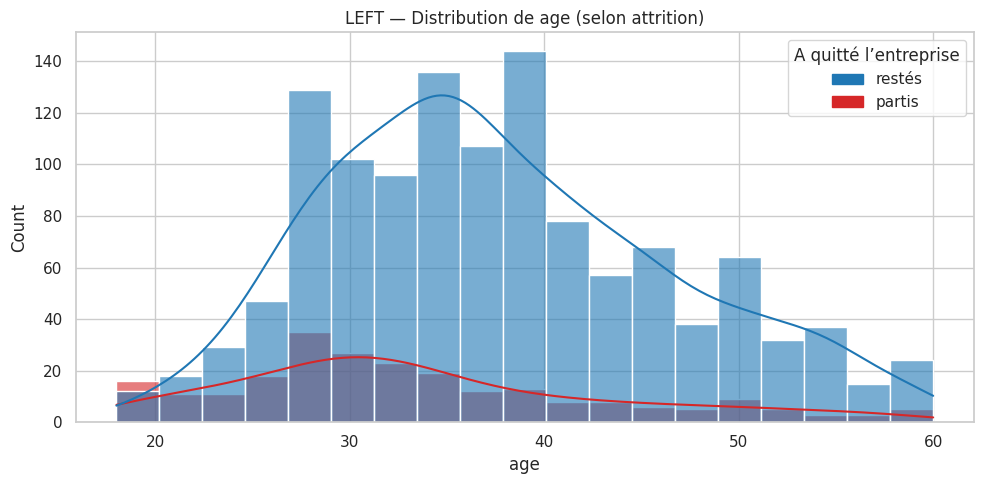

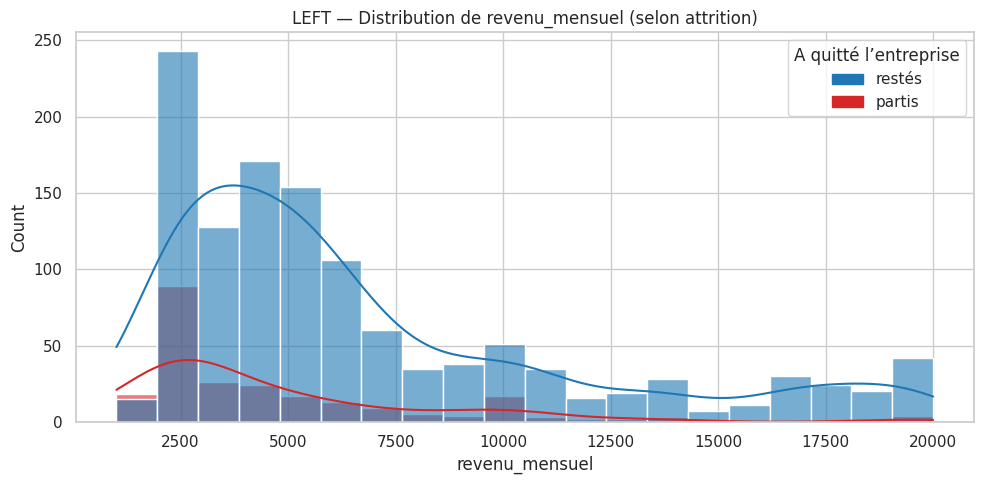

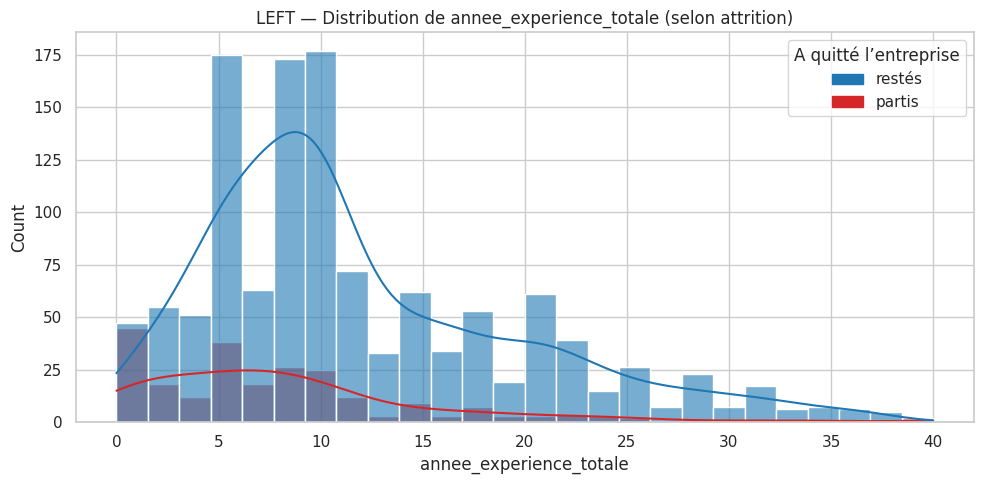

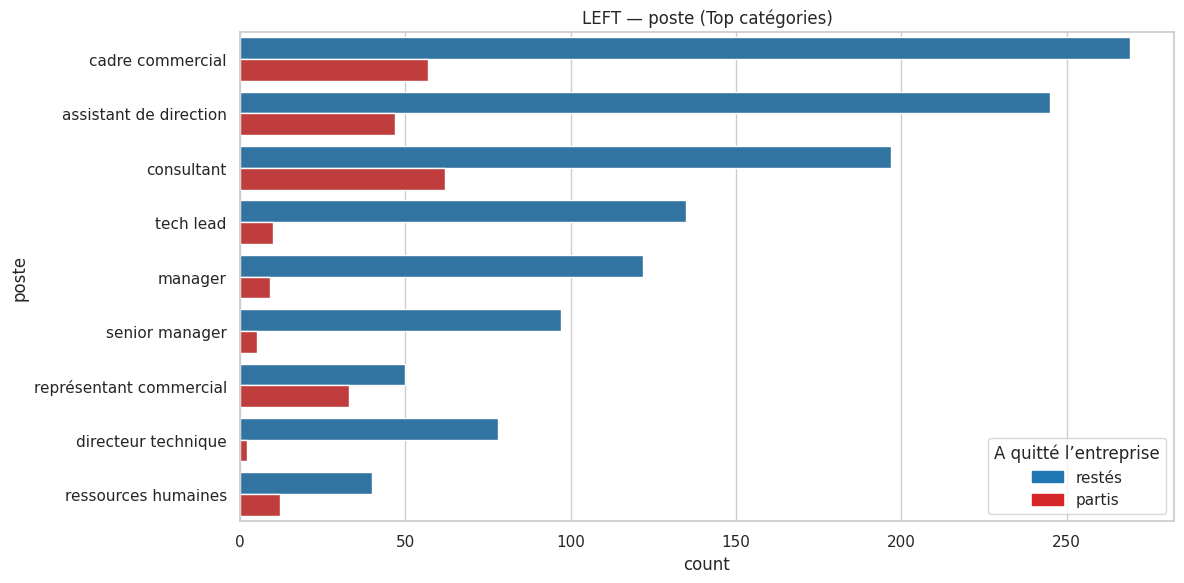

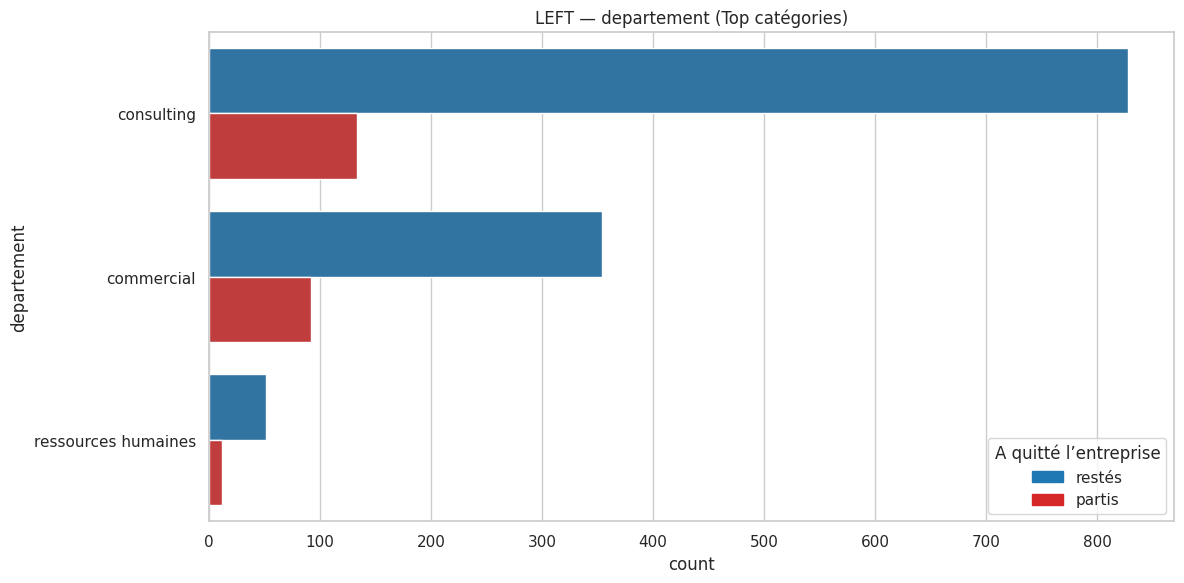

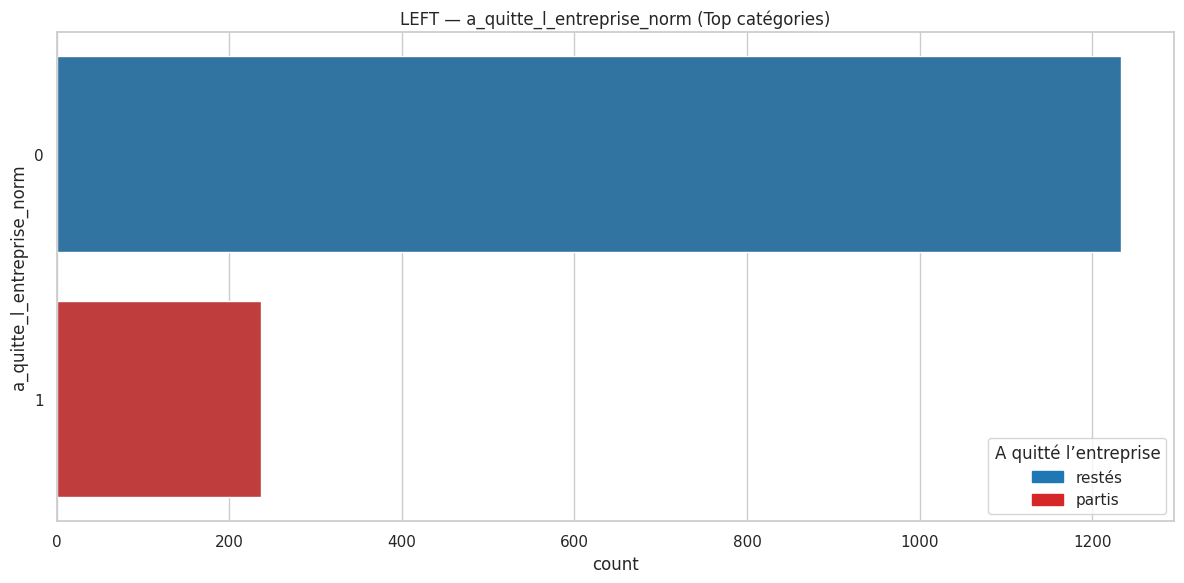

In [36]:

# =================================================================
# 📄 CELLULE 19 - Visualisation enrichie (df_left uniquement)
# =================================================================

from IPython.display import display, HTML
import matplotlib.patches as mpatches
import os

# Palette attrition : 0 = resté, 1 = parti
attrition_palette = {
    0: "#1f77b4",   # bleu = resté
    1: "#d62728"    # rouge = parti
}

# Création des patches manuels (légende 100% fiable)
restes_patch = mpatches.Patch(color=attrition_palette[0], label="restés")
partis_patch = mpatches.Patch(color=attrition_palette[1], label="partis")
manual_legend = [restes_patch, partis_patch]

# S'assurer que la variable binaire existe
if "a_quitte_l_entreprise_norm" not in df_left.columns and "a_quitte_l_entreprise" in df_left.columns:
    df_left["a_quitte_l_entreprise_norm"] = (
        df_left["a_quitte_l_entreprise"]
        .str.lower()
        .map({"non": 0, "oui": 1})
    )

# Variables quantitatives et qualitatives disponibles dans df_left
common_quant = [
    c for c in ["age", "revenu_mensuel", "anciennete", "annee_experience_totale"]
    if c in df_left.columns
]

common_cat = [
    c for c in ["poste", "departement", "a_quitte_l_entreprise_norm"]
    if c in df_left.columns
]

# ============================================================
# 🔵🔴 1️⃣ Variables quantitatives (Histogrammes) — df_left seul
# ============================================================

for c in common_quant:

    plt.figure(figsize=(10, 5))
    ax = sns.histplot(
        data=df_left,
        x=c,
        hue="a_quitte_l_entreprise_norm",
        palette=attrition_palette,
        kde=True,
        alpha=0.6,
        legend=False   # ← désactivation obligatoire !
    )

    plt.title(f"LEFT — Distribution de {c} (selon attrition)")
    plt.tight_layout()

    # --- Légende manuelle 100% fiable ---
    plt.legend(
        handles=manual_legend,
        title="A quitté l’entreprise"
    )

    # 🔥 Sauvegarde automatique
    filename = f"e01_left_dist_{c}.png"
    filepath = os.path.join(FIGURES_DIR, filename)
    plt.savefig(filepath)

    plt.show()

    # 📁 Affichage du chemin du fichier généré
    display(HTML(f"<b>📁 Image sauvegardée :</b> {filepath}"))
    display(HTML("<br><br>"))


# ============================================================
# 🔵🔴 2️⃣ Variables qualitatives (Countplot) — df_left seul
# ============================================================

for c in common_cat:

    plt.figure(figsize=(12, 6))
    ax = sns.countplot(
        data=df_left,
        y=c,
        hue="a_quitte_l_entreprise_norm",
        order=df_left[c].value_counts().index[:10],
        palette=attrition_palette,
        legend=False   # ← on désactive la légende auto ici aussi
    )

    plt.title(f"LEFT — {c} (Top catégories)")
    plt.tight_layout()

    # --- Légende manuelle 100% fiable ---
    plt.legend(
        handles=manual_legend,
        title="A quitté l’entreprise"
    )

    # 🔥 Sauvegarde automatique
    filename = f"e01_left_count_{c}.png"
    filepath = os.path.join(FIGURES_DIR, filename)
    plt.savefig(filepath)

    plt.show()

    # 📁 Affichage du chemin du fichier généré
    display(HTML(f"<b>📁 Image sauvegardée :</b> {filepath}"))
    display(HTML("<br><br>"))


## **20. Analyse bivariée enrichie**

Cette cellule réalise une analyse bivariée complète entre deux **variables quantitatives** (par défaut : `age` et `revenu_mensuel`) tout en intégrant la variable cible `a_quitte_l_entreprise_norm`.


### 🎯 Objectifs de la cellule
Elle permet de :
- Vérifier l’existence de la variable binaire d’attrition (`a_quitte_l_entreprise_norm`), sinon la créer.
- Sélectionner deux variables quantitatives (`x_col` et `y_col`) pour l’analyse.
- Générer un **scatter plot** enrichi :
  - couleur selon attrition (resté / parti),
  - droite de régression linéaire.
- Calculer les **corrélations** :
  - Pearson (linéaire),
  - Spearman (monotone),
  - Point-biserial (quantitative vs binaire).
- Mesurer le **pouvoir prédictif univarié** de `x_col` et `y_col` sur l’attrition via un :  
  👉 **AUC (Area Under the ROC Curve)**  
  basé sur une régression logistique simple.


### 📌 Résultats obtenus
La cellule fournit :
- Un scatter plot visuel et interprétable  
- Les coefficients de corrélation + p-values  
- Les AUC individuels (permettant d’évaluer la force discriminante de chaque variable)

### 🔧 Paramètres modifiables
On peut modifier directement dans la cellule Python :
```python
x_col = "age"
y_col = "revenu_mensuel"


👉 Analyse enrichie pour: age vs revenu_mensuel


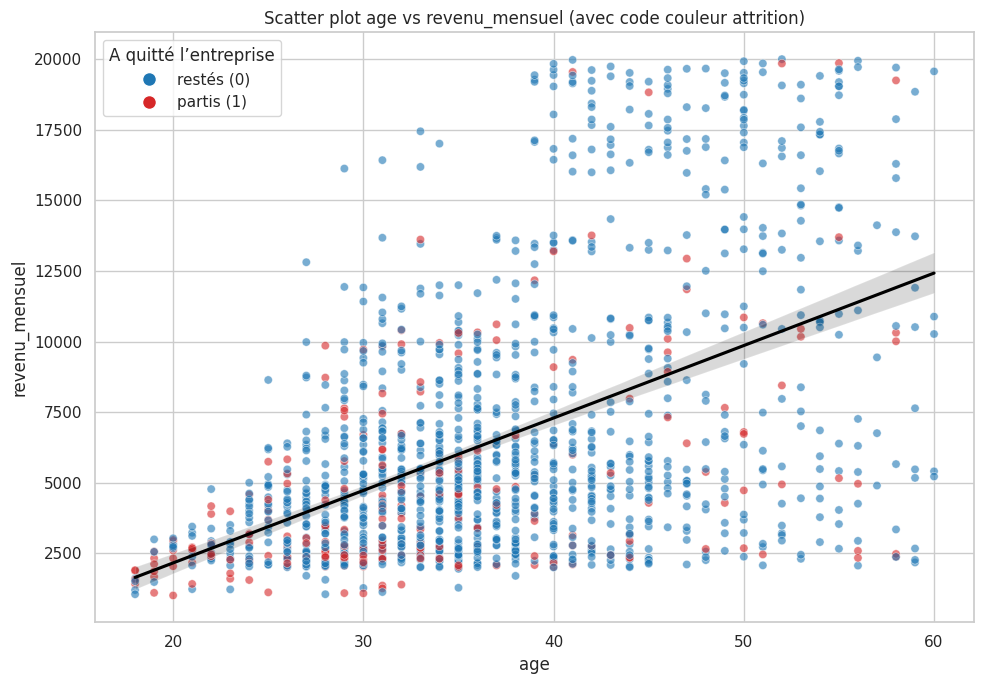

📁 Fichier enregistré : /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/outputs/figures/e01_left_scatter_age_vs_revenu_mensuel.png


📈 Corrélations quantitatives
 - Pearson : r = 0.4979, p-value = 6.6695e-93
 - Spearman : rho = 0.4719, p-value = 2.1835e-82

🎯 Corrélation variable vs cible (point-biserial)
 - age vs attrition : r = -0.1592, p = 8.3563e-10
 - revenu_mensuel vs attrition : r = -0.1598, p = 7.1474e-10

🚀 AUC univarié (pouvoir prédictif isolé)
 - age → AUC = 0.6343
 - revenu_mensuel → AUC = 0.6557

📌 Plus l’AUC est proche de 1, plus la variable est discriminante.


In [38]:

# =================================================================
# 📄 CELLULE 20 - Analyse bivariée enrichie (scatter + Pearson + Spearman + AUC)
# =================================================================

from scipy import stats
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os


# ======================================================
# 🎨 Palette couleurs attrition
# ======================================================
attrition_palette = {
    0: "#1f77b4",   # bleu = resté
    1: "#d62728"    # rouge = parti
}

# ======================================================
# 📌 1. Assurer que la variable binaire attrition existe
# ======================================================
if "a_quitte_l_entreprise_norm" not in df_left.columns:
    if "a_quitte_l_entreprise" in df_left.columns:
        df_left["a_quitte_l_entreprise_norm"] = (
            df_left["a_quitte_l_entreprise"]
            .str.lower()
            .map({"non": 0, "oui": 1})
        )
    else:
        print("⚠️ Aucun champ attrition trouvé.")
        raise ValueError("Impossible de colorer par attrition.")


# ======================================================
# 📌 2. Sélection des colonnes (modifiable)
# ======================================================
x_col = "age"
y_col = "revenu_mensuel"

print(f"👉 Analyse enrichie pour: {x_col} vs {y_col}")


# ======================================================
# 📌 3. Vérification existence colonnes
# ======================================================
if not (x_col in df_left.columns and y_col in df_left.columns):
    print(f"❌ Colonnes {x_col} ou {y_col} manquantes.")
else:

    # Nettoyage des données
    df_tmp = df_left[[x_col, y_col, "a_quitte_l_entreprise_norm"]].dropna()

    # ======================================================
    # 📊 4. Scatter + droite de régression + légende manuelle
    # ======================================================
    plt.figure(figsize=(10, 7))

    ax = sns.scatterplot(
        data=df_tmp,
        x=x_col,
        y=y_col,
        hue="a_quitte_l_entreprise_norm",
        palette=attrition_palette,
        alpha=0.6,
        legend=False   # 🔥 On désactive la légende de seaborn
    )

    # Droite de régression
    sns.regplot(
        x=x_col,
        y=y_col,
        data=df_tmp,
        scatter=False,
        color="black",
        ci=95
    )

    plt.title(f"Scatter plot {x_col} vs {y_col} (avec code couleur attrition)")
    plt.tight_layout()

    # ======================================================
    # 🟦🔴 Légende manuelle fiable
    # ======================================================
    handles = [
        plt.Line2D([0], [0], marker="o", color="w", label="restés (0)",
                   markerfacecolor=attrition_palette[0], markersize=10),
        plt.Line2D([0], [0], marker="o", color="w", label="partis (1)",
                   markerfacecolor=attrition_palette[1], markersize=10)
    ]
    plt.legend(title="A quitté l’entreprise", handles=handles, loc="best")

    # ======================================================
    # 💾 Sauvegarde + affichage chemin
    # ======================================================
    filename = f"e01_left_scatter_{x_col}_vs_{y_col}.png"
    save_path = os.path.join(FIGURES_DIR, filename)
    plt.savefig(save_path, dpi=300)
    plt.show()

    print(f"📁 Fichier enregistré : {save_path}\n")


    # ======================================================
    # 🔍 5. Corrélations Pearson + Spearman
    # ======================================================
    pearson_r, pearson_p = stats.pearsonr(df_tmp[x_col], df_tmp[y_col])
    spearman_r, spearman_p = stats.spearmanr(df_tmp[x_col], df_tmp[y_col])

    print("\n📈 Corrélations quantitatives")
    print(f" - Pearson : r = {pearson_r:.4f}, p-value = {pearson_p:.4e}")
    print(f" - Spearman : rho = {spearman_r:.4f}, p-value = {spearman_p:.4e}")


    # ======================================================
    # 🔗 6. Corrélation point-biserial avec la cible
    # ======================================================
    pb_r, pb_p = stats.pointbiserialr(df_tmp["a_quitte_l_entreprise_norm"], df_tmp[x_col])
    pb_r2, pb_p2 = stats.pointbiserialr(df_tmp["a_quitte_l_entreprise_norm"], df_tmp[y_col])

    print("\n🎯 Corrélation variable vs cible (point-biserial)")
    print(f" - {x_col} vs attrition : r = {pb_r:.4f}, p = {pb_p:.4e}")
    print(f" - {y_col} vs attrition : r = {pb_r2:.4f}, p = {pb_p2:.4e}")


    # ======================================================
    # 🧪 7. AUC univarié (pouvoir prédictif isolé)
    # ======================================================
    def compute_univariate_auc(feature):
        X = df_tmp[[feature]].values
        y = df_tmp["a_quitte_l_entreprise_norm"].values
        try:
            model = LogisticRegression(max_iter=1000)
            model.fit(X, y)
            probs = model.predict_proba(X)[:, 1]
            return roc_auc_score(y, probs)
        except:
            return None

    auc_x = compute_univariate_auc(x_col)
    auc_y = compute_univariate_auc(y_col)

    print("\n🚀 AUC univarié (pouvoir prédictif isolé)")
    print(f" - {x_col} → AUC = {auc_x:.4f}")
    print(f" - {y_col} → AUC = {auc_y:.4f}")

    print("\n📌 Plus l’AUC est proche de 1, plus la variable est discriminante.")


## **21. Régression linéaire enrichie (colorée par attrition)**


Cette cellule réalise une analyse avancée de la relation entre deux variables quantitatives (`Xcol` → `Ycol`) en tenant compte du statut d’attrition (`a_quitte_l_entreprise_norm`).  
Elle combine régression globale, régressions séparées par groupe, et visualisation comparée.

---

### 🎯 Objectifs de la cellule

#### 1. **Préparation des données**
- Vérification de la présence des colonnes :  
  - `Xcol` : variable explicative  
  - `Ycol` : variable cible  
  - `attr_col` : variable binaire d’attrition  
- Nettoyage : suppression des valeurs manquantes, harmonisation de l’attrition au format numérique (0/1).

#### 2. **Régression linéaire globale**
- Modèle linéaire unique sur tout l’échantillon.
- Extraction des métriques :
  - Coefficient *a*
  - Intercept *b*
  - R²
  - RMSE
  - MAE

#### 3. **Régressions séparées par groupe d’attrition**
- 1 régression pour les employés restés (0)
- 1 régression pour les employés partis (1)
- Permet d’observer des différences structurelles entre les deux populations.

#### 4. **Visualisation enrichie**
- Scatter plot avec couleur en fonction de l’attrition.
- Droite de régression globale.
- Deux droites de régression spécifiques aux groupes 0 et 1.
- Compréhension immédiate des changements de pente ou d'intercept entre groupes.

---

### 📌 Paramètres modifiables

Dans la cellule Python, modifier simplement :

```python
Xcol = "age"
Ycol = "revenu_mensuel"
attr_col = "a_quitte_l_entreprise_norm"






🔹 Régression linéaire globale : y = a*x + b
   a (coef)       = 256.8684
   b (intercept)  = -3063.7259
   R²             = 0.2191
   RMSE           = 4131.2628
   MAE            = 3039.8461

🔸 Régression pour groupe = 0 (restés)
   a = 263.8375, b = -3077.3229

🔸 Régression pour groupe = 1 (partis)
   a = 188.0722, b = -1533.5626




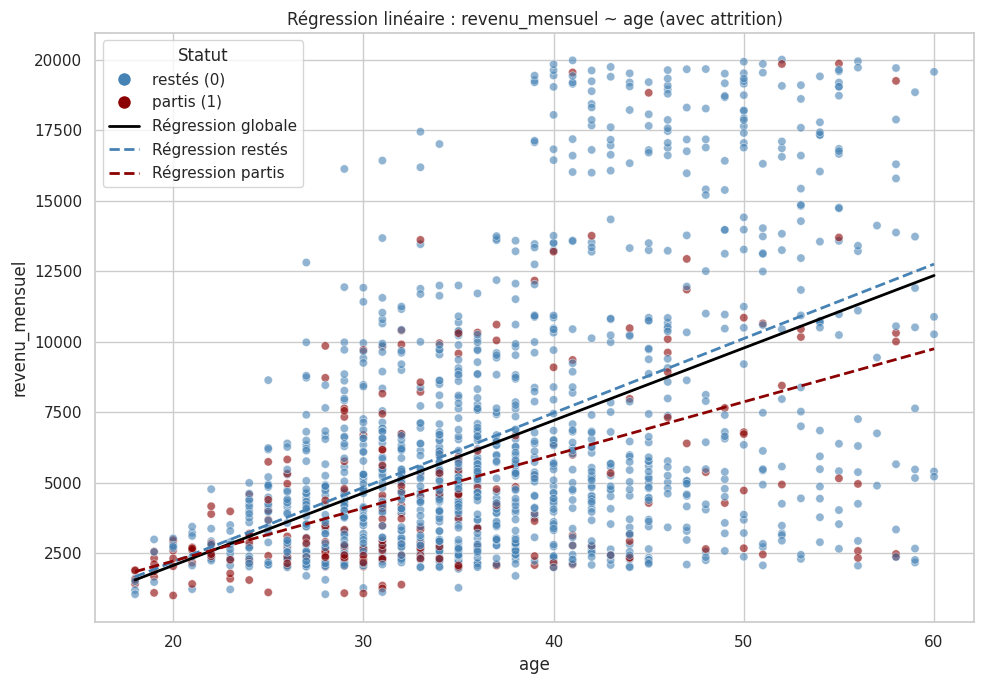

📁 Fichier enregistré : /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/outputs/figures/e01_left_regression_age_vs_revenu_mensuel.png


In [40]:

# =================================================================
# 📄 CELLULE 21 - Régression linéaire enrichie (colorée par attrition)
#    X -> Y, comparaison attrition/non-attrition, métriques complètes
# =================================================================


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

print("\n")

# -----------------------
# Choisir les colonnes
# -----------------------
Xcol = "age"
Ycol = "revenu_mensuel"
attr_col = "a_quitte_l_entreprise_norm"

# -----------------------
# Vérification colonnes
# -----------------------
missing_cols = [c for c in [Xcol, Ycol, attr_col] if c not in df_left.columns]

if missing_cols:
    print("Colonnes manquantes :", missing_cols)
else:

    # Convertir attrition en numérique si nécessaire
    df_tmp = df_left[[Xcol, Ycol, attr_col]].dropna().copy()

    if df_tmp[attr_col].dtype == "object":
        df_tmp[attr_col] = (
            df_tmp[attr_col].str.lower().map({"non": 0, "oui": 1, "false": 0, "true": 1})
        )

    df_tmp = df_tmp.dropna()

    # -----------------------
    # Jeu de données (version propre)
    # -----------------------
    X = df_tmp[[Xcol]].copy()
    y = df_tmp[Ycol].copy()
    attr = df_tmp[attr_col].copy()

    X_train, X_test, y_train, y_test, attr_train, attr_test = train_test_split(
        X, y, attr, test_size=0.2, random_state=42
    )

    # -----------------------
    # Régression totale (globale)
    # -----------------------
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    print("🔹 Régression linéaire globale : y = a*x + b")
    print(f"   a (coef)       = {model.coef_[0]:.4f}")
    print(f"   b (intercept)  = {model.intercept_:.4f}")
    print(f"   R²             = {r2:.4f}")
    print(f"   RMSE           = {rmse:.4f}")
    print(f"   MAE            = {mae:.4f}")

    # -----------------------
    # Régression distincte par attrition
    # -----------------------
    models_attr = {}
    for group in [0, 1]:
        df_g = df_tmp[df_tmp[attr_col] == group]
        if len(df_g) > 5:
            m = LinearRegression()
            m.fit(df_g[[Xcol]], df_g[Ycol])
            models_attr[group] = m
            print(f"\n🔸 Régression pour groupe = {group} ({'restés' if group == 0 else 'partis'})")
            print(f"   a = {m.coef_[0]:.4f}, b = {m.intercept_:.4f}")

    print("\n")

    # -----------------------
    # Scatter + régressions + légende manuelle
    # -----------------------
    plt.figure(figsize=(10, 7))
    palette = {0: "steelblue", 1: "darkred"}

    sns.scatterplot(
        x=df_tmp[Xcol],
        y=df_tmp[Ycol],
        hue=df_tmp[attr_col],
        palette=palette,
        alpha=0.6,
        legend=False      # 🔥 Désactivation pour mettre une légende 100% manuelle
    )

    # droite globale
    xs = pd.DataFrame(
        np.linspace(df_tmp[Xcol].min(), df_tmp[Xcol].max(), 200),
        columns=[Xcol]
    )
    plt.plot(xs[Xcol], model.predict(xs),
             color="black", linewidth=2, label="Régression globale")

    # lignes par groupe
    for group, m in models_attr.items():
        plt.plot(
            xs[Xcol],
            m.predict(xs),
            linestyle="--",
            linewidth=2,
            color=palette[group],
            label=f"Régression {'restés' if group == 0 else 'partis'}"
        )

    plt.title(f"Régression linéaire : {Ycol} ~ {Xcol} (avec attrition)")
    plt.xlabel(Xcol)
    plt.ylabel(Ycol)

    # -----------------------
    # ⭐ Légende manuelle fiable
    # -----------------------
    handles = [
        plt.Line2D([0], [0], marker="o", color="w", label="restés (0)",
                   markerfacecolor=palette[0], markersize=10),
        plt.Line2D([0], [0], marker="o", color="w", label="partis (1)",
                   markerfacecolor=palette[1], markersize=10)
    ]
    handles += plt.gca().lines[-(len(models_attr)+1):]  # ajoute lignes de régression

    plt.legend(title="Statut", handles=handles, loc="best")

    plt.tight_layout()

    # -----------------------
    # 💾 Sauvegarde + affichage chemin
    # -----------------------
    filename = f"e01_left_regression_{Xcol}_vs_{Ycol}.png"
    save_path = os.path.join(FIGURES_DIR, filename)
    plt.savefig(save_path, dpi=300)
    plt.show()

    print(f"📁 Fichier enregistré : {save_path}")


## **22. ANOVA enrichie + Visualisations par attrition**

Cette cellule réalise une analyse ANOVA complète entre :  
- **Variable quantitative** : `revenu_mensuel`  
- **Variable qualitative** : `poste`  
- **Coloration par attrition** : `a_quitte_l_entreprise_norm` (si disponible)

### Contenu de la cellule
1. **Nettoyage automatique** de la variable quantitative (retrait %, virgules, conversion float).  
2. **Vérification des colonnes** nécessaires à l'analyse.  
3. **Boxplot enrichi** (Top 12 catégories de *poste*)  
   - Coloré selon l’attrition si la colonne est disponible.  
4. **ANOVA à un facteur**  
   - Calcul : F-stat, p-value, eta² (taille d'effet).  
5. **Visualisation complémentaire** : Stripplot coloré par attrition  
   - Permet de mieux visualiser la distribution de chaque poste.

## Objectifs
- Vérifier si les différences de revenu par poste sont statistiquement significatives.  
- Identifier visuellement les écarts entre salariés partis/restés.  
- Compléter l'analyse qualitative/quantitative de l’étape exploratoire.


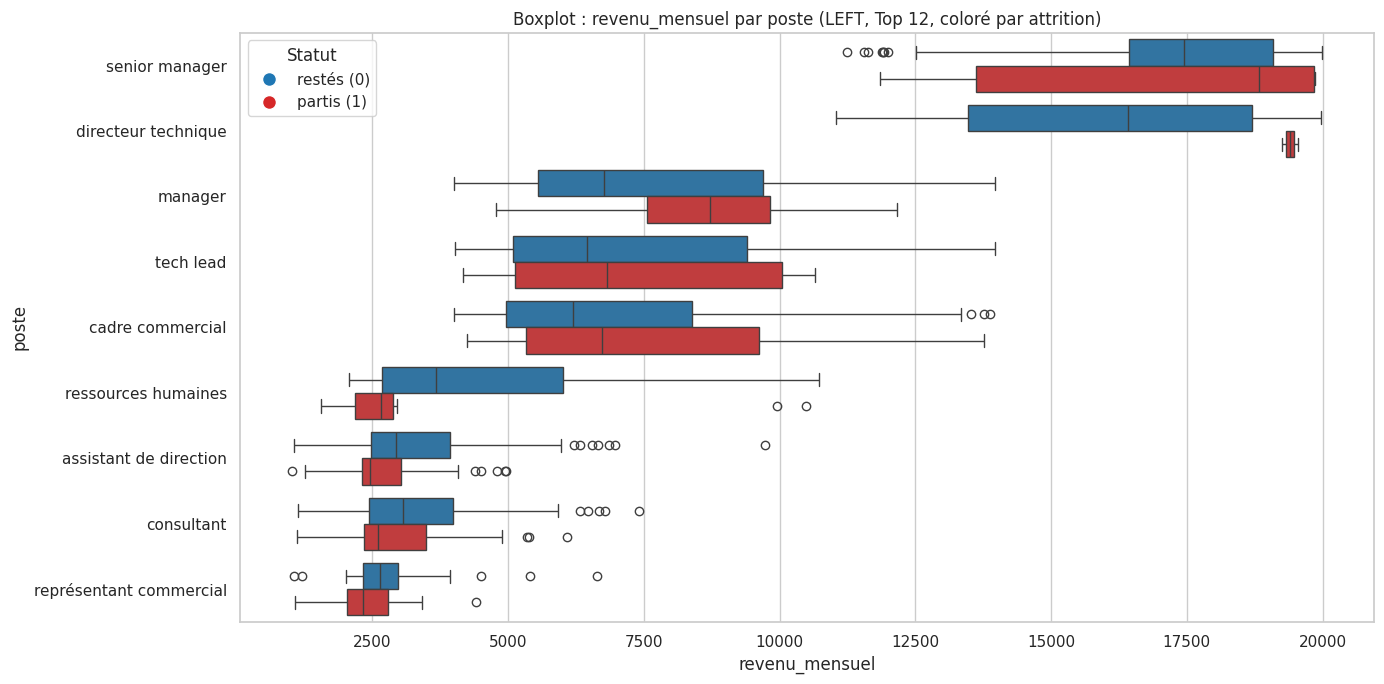

📁 Boxplot enregistré : /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/outputs/figures/e01_left_anova_boxplot.png


📊 **ANOVA — Effet du poste sur le revenu**
  • F       = 810.2141
  • p-value = 0.0000e+00
  • eta²    = 0.8161  (taille d'effet)




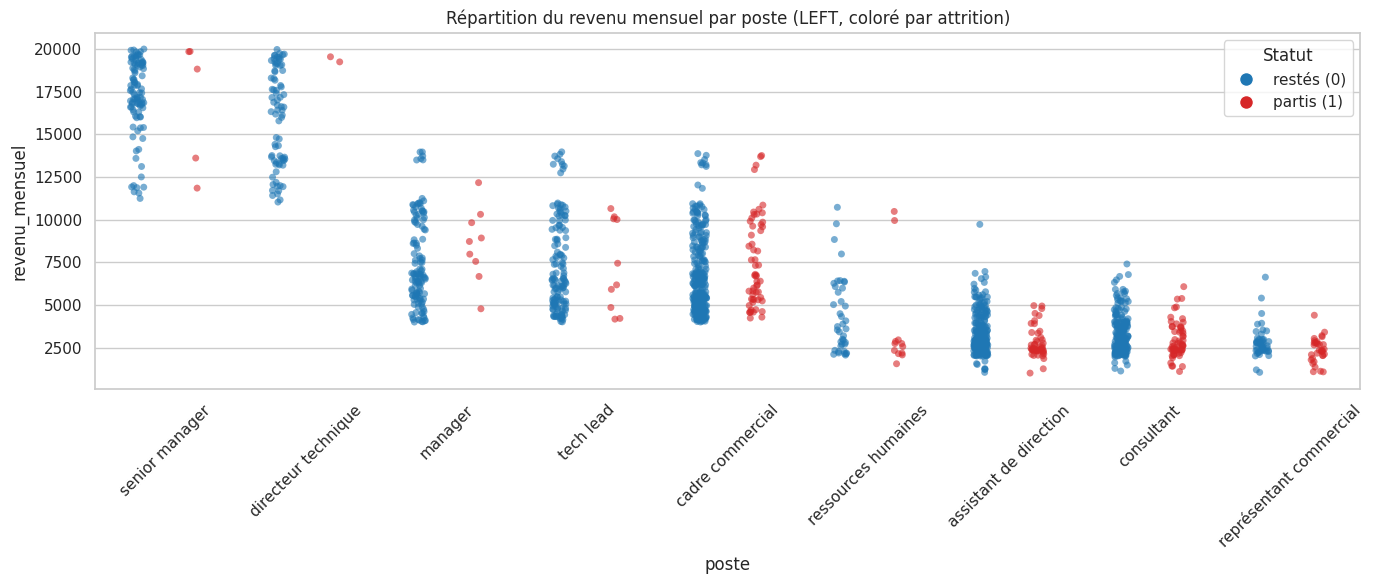

📁 Stripplot enregistré : /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/outputs/figures/e01_left_anova_stripplot.png


In [42]:

# =================================================================
# 📄 CELLULE 22 - ANOVA enrichie + visualisation par attrition (boxplot + stripplot)
# Quantitative (revenu_mensuel) vs Qualitative (poste)
# Ajout :
#   ✔ palette attrition
#   ✔ légende manuelle 100% fiable (restés / partis)
#   ✔ sauvegarde + affichage chemins des fichiers
# =================================================================


print("\n")

# Colonnes analysées
quant = "revenu_mensuel"
quali = "poste"
attrition_col = "a_quitte_l_entreprise_norm"

# ---------------------------------------------------------------
# 🎨 Palette attrition (0 = restés, 1 = partis)
# ---------------------------------------------------------------
attr_palette = {0: "#1f77b4", 1: "#d62728"}  # bleu / rouge

legend_manual = [
    plt.Line2D([0], [0], marker="o", color="w", label="restés (0)",
               markerfacecolor=attr_palette[0], markersize=10),
    plt.Line2D([0], [0], marker="o", color="w", label="partis (1)",
               markerfacecolor=attr_palette[1], markersize=10),
]


# ---------------------------------------------------------------
# 🧹 1. Normalisation de la variable quantitative
# ---------------------------------------------------------------
if quant in df_left.columns:
    df_left[quant] = (
        df_left[quant]
        .astype(str)
        .str.replace("%", "", regex=False)
        .str.replace(",", ".", regex=False)
        .str.extract(r"([\d\.]+)")
        .astype(float)
    )

# ---------------------------------------------------------------
# 2. Vérifications
# ---------------------------------------------------------------
if quant not in df_left.columns or quali not in df_left.columns:
    print("❌ Colonnes manquantes pour ANOVA.")
    raise ValueError("Impossible d'exécuter la cellule 22.")

color_available = attrition_col in df_left.columns

# ---------------------------------------------------------------
# 3. Boxplot attrition (Top 12 postes)
# ---------------------------------------------------------------
plt.figure(figsize=(14, 7))

order = (
    df_left.groupby(quali)[quant]
    .median()
    .sort_values(ascending=False)
    .index[:12]
)

df_plot = df_left[df_left[quali].isin(order)]

if color_available:
    sns.boxplot(
        x=quant,
        y=quali,
        hue=attrition_col,
        data=df_plot,
        order=order,
        palette=attr_palette,
        dodge=True
    )
else:
    sns.boxplot(
        x=quant,
        y=quali,
        data=df_plot,
        order=order
    )

plt.title(f"Boxplot : {quant} par {quali} (LEFT, Top 12, coloré par attrition)")

# --------------------- légende manuelle -----------------------
if color_available:
    plt.legend(
        title="Statut",
        handles=legend_manual,
        loc="best"
    )
else:
    plt.legend().remove()

plt.tight_layout()

# 🔥 Sauvegarde
filename_box = "e01_left_anova_boxplot.png"
save_path_box = os.path.join(FIGURES_DIR, filename_box)
plt.savefig(save_path_box, dpi=300)
plt.show()

print(f"📁 Boxplot enregistré : {save_path_box}\n")


# ---------------------------------------------------------------
# 4. ANOVA classique
# ---------------------------------------------------------------
groups = [
    group[quant].dropna().values
    for _, group in df_left.groupby(quali)
    if len(group) >= 2
]

if len(groups) < 2:
    print("❌ Pas assez de groupes pour une ANOVA.")
else:
    f_stat, p_val = stats.f_oneway(*groups)
    overall_mean = df_left[quant].mean()

    # Calcul Eta²
    ssb = sum(
        len(group[quant]) * (group[quant].mean() - overall_mean) ** 2
        for _, group in df_left.groupby(quali)
        if len(group) >= 2
    )
    sst = ((df_left[quant] - overall_mean) ** 2).sum()
    eta2 = ssb / sst if sst > 0 else np.nan

    print("\n📊 **ANOVA — Effet du poste sur le revenu**")
    print(f"  • F       = {f_stat:.4f}")
    print(f"  • p-value = {p_val:.4e}")
    print(f"  • eta²    = {eta2:.4f}  (taille d'effet)")

print("\n")


# ---------------------------------------------------------------
# 5. Stripplot (répartition des valeurs individuelles)
# ---------------------------------------------------------------
plt.figure(figsize=(14, 6))

if color_available:
    sns.stripplot(
        x=quali,
        y=quant,
        hue=attrition_col,
        data=df_plot,
        order=order,
        dodge=True,
        palette=attr_palette,
        alpha=0.6
    )
else:
    sns.stripplot(
        x=quali,
        y=quant,
        data=df_plot,
        order=order,
        alpha=0.6
    )

plt.xticks(rotation=45)
plt.title(f"Répartition du revenu mensuel par poste (LEFT, coloré par attrition)")

# légende manuelle
if color_available:
    plt.legend(title="Statut", handles=legend_manual)
else:
    plt.legend().remove()

plt.tight_layout()

# 🔥 Sauvegarde stripplot
filename_strip = "e01_left_anova_stripplot.png"
save_path_strip = os.path.join(FIGURES_DIR, filename_strip)
plt.savefig(save_path_strip, dpi=300)
plt.show()

print(f"📁 Stripplot enregistré : {save_path_strip}")


## **23. Analyse Quali × Quali enrichie (colorée par attrition)**


Cette cellule analyse la relation entre **deux variables qualitatives** du dataset `df_left`, par exemple :  
- `statut_marital`  
- `a_quitte_l_entreprise_norm` (variable d’attrition binaire)

### Contenu de cette cellule

#### 🔹 1. Préparation des variables
- Normalisation du texte (minuscules, suppression espaces).  
- Encodage de l’attrition en binaire si nécessaire.

#### 🔹 2. Tableau de contingence
- Affichage d’un tableau croisant les catégories de `cat1` et `cat2`.  
- Test du **Chi² d’indépendance** :  
  - Statistique χ²  
  - p-value  
  - Degrés de liberté  
  - Table d’effectifs attendus

#### 🔹 3. Visualisations enrichies
1. **Barplot des taux d’attrition** par catégorie de `cat1`.  
2. **Heatmap des résidus standardisés** :  
   - Sur-représentation (valeurs > 0)  
   - Sous-représentation (valeurs < 0)  
   - Interprétation visuelle de la contribution au Chi²  

#### 🔹 4. Mesure d’association : Cramér’s V
- Mesure la **force de l’association** entre les deux variables qualitatives.  
- Valeurs :
  - 0 → aucune relation  
  - 1 → relation très forte  

### Objectif
Permet d’identifier rapidement si certaines catégories sont **sur-représentées** parmi les salariés partis/restés, et d’évaluer la **force statistique** de cette relation.





In [ ]:
# ==========================================
# 🔧 FIX : Nettoyage robuste attrition (0/1)
# ==========================================

col = "a_quitte_l_entreprise_norm"

# 1) Normalisation de texte (version string)
df_left[col] = df_left[col].astype(str).str.strip().str.lower()

# 2) Mapping propre sans remplacer plusieurs types
mapping = {
    "oui": 1, "1": 1, "true": 1, "vrai": 1,
    "non": 0, "0": 0, "false": 0, "faux": 0
}

df_left[col] = df_left[col].map(mapping)

# 3) Vérification valeurs non converties
bad_vals = df_left[col].isna().sum()
print(f"Valeurs non converties dans '{col}' : {bad_vals}")

# 4) Suppression des lignes invalides
df_left = df_left.dropna(subset=[col])

# 5) Conversion finale en entier propre
df_left[col] = df_left[col].astype(int)


In [ ]:

df_left["a_quitte_l_entreprise_norm"].value_counts(dropna=False)
df_left["a_quitte_l_entreprise_norm"].dtype


In [ ]:
print("Vérification finale colonne attrition norm :")
print(df_left["a_quitte_l_entreprise_norm"].unique())




Valeurs uniques de la cible (avant conversion) : ['1' '0']
✔ Colonne cible convertie en entier (0/1).


=== 📊 TABLEAU DE CONTINGENCE ===


attrition_label,partis,restés
statut_marital,,
célibataire,120,350
divorcé(e),33,294
marié(e),84,589





Chi² = 46.1637, p-value = 9.4555e-11, dof = 2




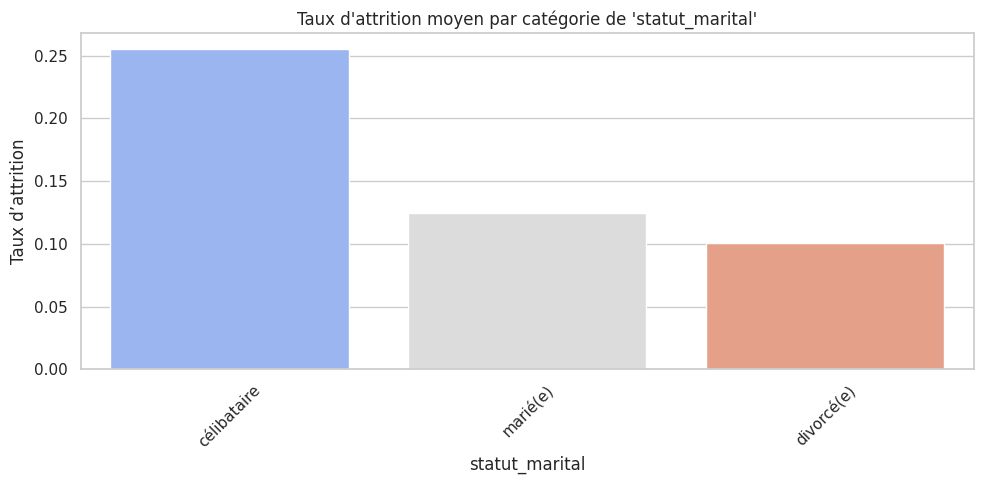

📁 Boxplot enregistré : /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/outputs/figures/e01_left_barplot_attrition_par_categorie.png





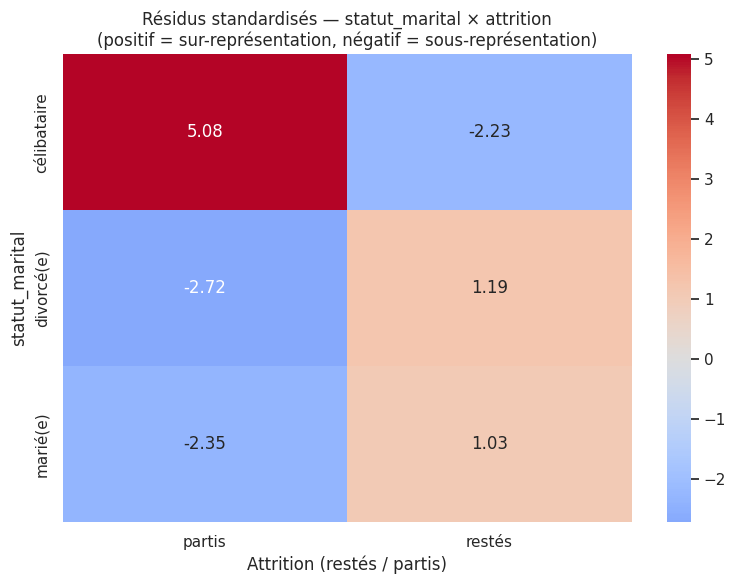

📁 Boxplot enregistré : /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/outputs/figures/e01_left_heatmap_residus.png




Cramér’s V = 0.1772  (0 = aucune association, 1 = association forte)




In [45]:

# =================================================================
# 📄 CELLULE 23 - Analyse quali vs quali enrichie (colorée par attrition)
# Exemple : statut_marital vs a_quitte_l_entreprise_norm
# Modifs demandées :
#  - Sauvegarde des graphiques + affichage chemin
#  - Remplacement 0/1 par "restés" / "partis"
#  - Axes X/Y corrigés pour heatmap + barplot
# =================================================================


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

print("\n")

cat1 = "statut_marital"
cat2 = "a_quitte_l_entreprise_norm"   # Target nettoyée et normalisée

# Répertoire figures
# FIGURES_DIR = os.path.join(PROJECT_DIR, "figures")

# ================================================================
# 🧹 1) Normalisation du texte (sécurisée)
# ================================================================
for c in [cat1, cat2]:
    if c in df_left.columns:
        df_left[c] = (
            df_left[c]
            .astype(str)
            .str.strip()
            .str.lower()
        )

# ================================================================
# 🔍 2) Vérification & conversion de la colonne Target
# ================================================================
if "a_quitte_l_entreprise_norm" in df_left.columns:

    # Conversion en binaire si nécessaire
    if df_left[cat2].dtype == object:
        unique_vals = df_left[cat2].unique()
        print("Valeurs uniques de la cible (avant conversion) :", unique_vals)

        if set(unique_vals).issubset({"0", "1"}):
            df_left[cat2] = df_left[cat2].astype(int)
            print("✔ Colonne cible convertie en entier (0/1).")
        else:
            print("⚠ Attention : valeurs inattendues dans la cible :", unique_vals)

    # 🔥 Remplacement définitif 0 → restés, 1 → partis
    df_left["attrition_label"] = df_left[cat2].map({0: "restés", 1: "partis"})

else:
    print("❌ Colonne 'a_quitte_l_entreprise_norm' absente.")
    raise ValueError("Impossible de poursuivre la Cellule 23.")

print("\n")

# ================================================================
# 🔎 3) Vérification colonnes
# ================================================================
if not (cat1 in df_left.columns and cat2 in df_left.columns):
    print("❌ Colonnes quali × quali non trouvées. Vérifie les noms.")
else:

    # =================================================================
    # 📊 4) TABLEAU DE CONTINGENCE (labels remplacés)
    # =================================================================
    print("=== 📊 TABLEAU DE CONTINGENCE ===")
    contingency = pd.crosstab(df_left[cat1], df_left["attrition_label"])
    display(contingency)

    print("\n")

    # Test chi2
    chi2, p, dof, expected = stats.chi2_contingency(contingency)
    print(f"\nChi² = {chi2:.4f}, p-value = {p:.4e}, dof = {dof}")
    # print("\n")

    # =================================================================
    # 🔥 5) BARPLOT — Taux d'attrition
    # =================================================================
    attrition_rate = (
        df_left.groupby(cat1)[cat2]
        .mean()
        .sort_values(ascending=False)
    )

    fig = plt.figure(figsize=(10, 5))

    sns.barplot(
        x=attrition_rate.index,
        y=attrition_rate.values,
        hue=attrition_rate.index,
        palette=sns.color_palette("coolwarm", len(attrition_rate)),
        dodge=False,
        legend=False
    )

    plt.xticks(rotation=45)
    plt.title(f"Taux d'attrition moyen par catégorie de '{cat1}'")
    plt.ylabel("Taux d’attrition")
    plt.tight_layout()

    # 🔥 Sauvegarde
    fname = "e01_left_barplot_attrition_par_categorie.png"
    save_path_box = os.path.join(FIGURES_DIR, fname)
    plt.savefig(save_path_box, dpi=300)
    plt.show()

    print(f"📁 Boxplot enregistré : {save_path_box}\n")

    print("\n")


    # =================================================================
    # 🔥 6) HEATMAP — Résidus standardisés
    # =================================================================
    resid_std = (contingency - expected) / np.sqrt(expected)

    fig = plt.figure(figsize=(8, 6))
    sns.heatmap(
        resid_std,
        annot=True,
        cmap="coolwarm",
        center=0,
        fmt=".2f"
    )

    plt.title(
        f"Résidus standardisés — {cat1} × attrition\n"
        f"(positif = sur-représentation, négatif = sous-représentation)"
    )
    plt.ylabel(cat1)
    plt.xlabel("Attrition (restés / partis)")
    plt.tight_layout()

    # 🔥 Sauvegarde
    fname = "e01_left_heatmap_residus.png"
    save_path_box = os.path.join(FIGURES_DIR, fname)
    plt.savefig(save_path_box, dpi=300)
    plt.show()

    print(f"📁 Boxplot enregistré : {save_path_box}\n")

    print("\n")


    # =================================================================
    # 🔥 7) CRAMER’S V
    # =================================================================
    def cramers_v(confusion_matrix):
        chi2_val = stats.chi2_contingency(confusion_matrix)[0]
        n = confusion_matrix.values.sum()
        r, k = confusion_matrix.shape
        return np.sqrt(chi2_val / (n * (min(r, k) - 1)))

    cramerv = cramers_v(contingency)
    print(f"\nCramér’s V = {cramerv:.4f}  "
          "(0 = aucune association, 1 = association forte)")
    # print("\n")


## **24. Baseline avec RandomForest : importance des features**


Cette cellule construit une **baseline simple** avec un modèle de type **RandomForestClassifier** pour identifier les variables les plus importantes expliquant la variable cible **d’attrition**.

### 🎯 Objectifs
- Vérifier quelle colonne contient le label (`a_quitte_l_entreprise_norm` ou `a_quitte_l_entreprise`).
- Encoder proprement la cible si elle est textuelle (ex : "oui"/"non").
- Construire un jeu de données modèle avec :
  - variables **numériques**,
  - variables **catégorielles** à faible cardinalité *(≤ 15 catégories)*.
- Convertir toutes les variables catégorielles en indicateurs **one-hot**.
- Entraîner un **RandomForest** pour obtenir une première estimation robuste et rapide des **features importantes**.
- Afficher :
  - Le **top 30** des features les plus informatives,
  - un **barplot** clair de ces importances.

### 🧩 Pourquoi cette étape ?
Cette baseline sert à :
- Identifier rapidement les **leviers explicatifs** liés au churn,
- Détecter les variables possiblement utiles pour un futur modèle plus avancé,
- Comprendre la structure globale du dataset.

Ce n’est **pas un modèle final**, mais un outil de screening essentiel avant la construction du pipeline ML.




==================== CELLULE 24 — Baseline RF ====================

Colonnes supprimées pour éviter Fuite de Cible : ['a_quitte_l_entreprise', 'a_quitte_l_entreprise_norm']
Colonnes ID supprimées : ['id_employee']


Nb variables numériques     : 21
Nb variables catégorielles : 12

Taille X : (1470, 57)
Taille y : (1470,)

ROC AUC (5-fold CV) : [1. 1. 1. 1. 1.]  -> mean: 1.0

Top 30 Features (Importance classique) :


,0
attrition_label_restés,0.613301
revenu_mensuel,0.033310
age,0.029307
heure_supplementaires_oui,0.028613
annee_experience_totale,0.023169
annees_dans_l_entreprise,0.019129
distance_domicile_travail,0.018033
annes_sous_responsable_actuel,0.016134
nombre_participation_pee,0.015665
satisfaction_employee_environnement,0.013763


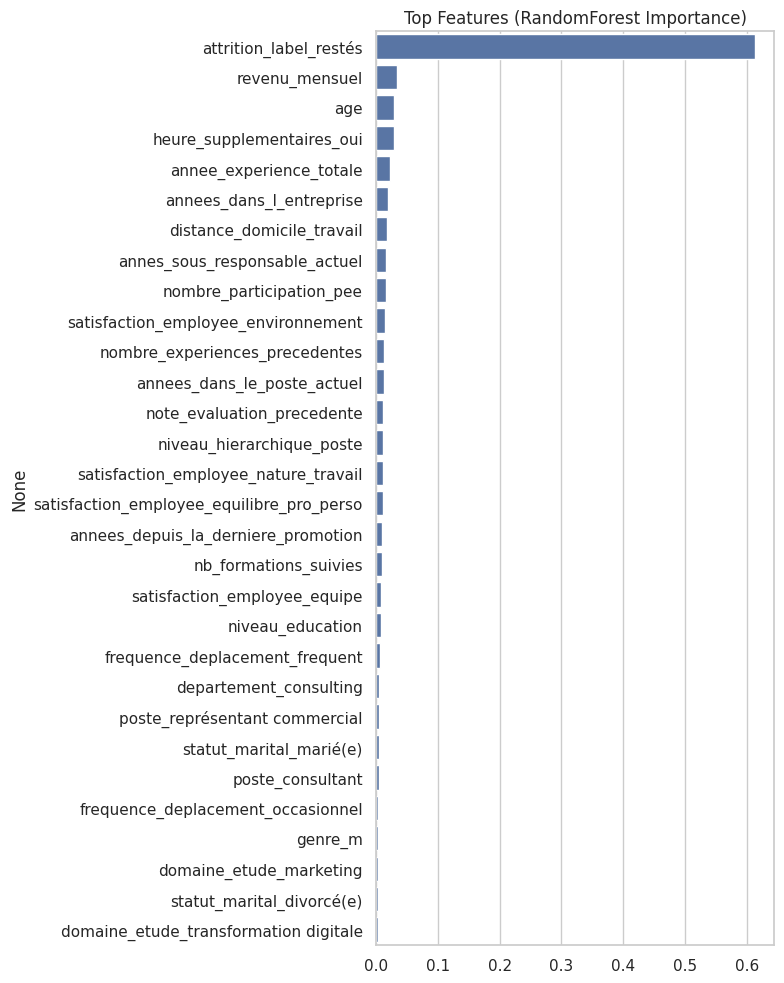


Top 30 Features (Permutation Importance) :


,0
attrition_label_restés,0.26839
revenu_mensuel,0.00000
nombre_experiences_precedentes,0.00000
nombre_heures_travaillees,0.00000
annee_experience_totale,0.00000
annees_dans_l_entreprise,0.00000
annees_dans_le_poste_actuel,0.00000
satisfaction_employee_environnement,0.00000
age,0.00000
niveau_hierarchique_poste,0.00000


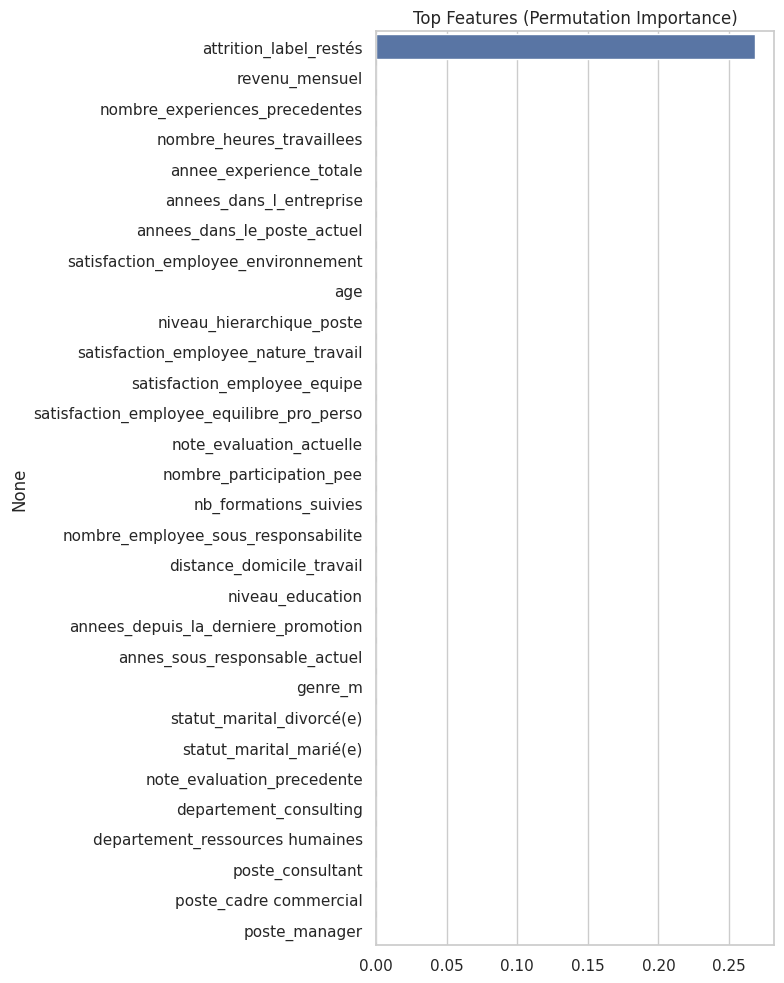


ROC AUC avec label *shufflé* (attendu ≈ 0.5) : 0.5345

================== FIN CELLULE 24 ==================



In [46]:

# =================================================================
# 📄 CELLULE 24 - Baseline RandomForest (correcte, sans fuite de cible)
# -----------------------------------------------------------------
# Objectif :
# - Créer un modèle baseline sans fuite de cible
# - Identifier les variables réellement liées à l’attrition
# - Vérifier la robustesse (CV, permutation importance, sanity check)
# =================================================================

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

print("\n==================== CELLULE 24 — Baseline RF ====================\n")

# -----------------------------------------------------------------
# 1) Label à prédire
# -----------------------------------------------------------------
label_col = "a_quitte_l_entreprise_norm"

# df_left contient toutes les variables après clean + enrichissement
df_model_original = df_left.copy()

# -----------------------------------------------------------------
# 2) Assurer que le label est bien numérique (0 / 1)
# -----------------------------------------------------------------
df_model_original[label_col] = (
    df_model_original[label_col]
        .astype(str).str.strip().str.lower()
        .map({"oui":1, "1":1, "true":1, "non":0, "0":0, "false":0})
)

df_model_original = df_model_original.dropna(subset=[label_col])
df_model_original[label_col] = df_model_original[label_col].astype(int)

# -----------------------------------------------------------------
# 3) Copier df_model et retirer toute fuite de cible
# -----------------------------------------------------------------
df_model = df_model_original.copy()

target_candidates = [
    "a_quitte_l_entreprise",
    "a_quitte_l_entreprise_norm",
    "attrition",
    "quitte_entreprise",
]

cols_to_drop_leak = [c for c in df_model.columns if c.lower() in target_candidates]

print("Colonnes supprimées pour éviter Fuite de Cible :", cols_to_drop_leak)
df_model = df_model.drop(columns=cols_to_drop_leak, errors='ignore')

# -----------------------------------------------------------------
# 4) Retirer colonnes identifiants (id_employee, employee_id, etc.)
# -----------------------------------------------------------------
id_cols = [c for c in df_model.columns if "id" in c.lower() or c.lower().endswith("_id")]
print("Colonnes ID supprimées :", id_cols)
df_model = df_model.drop(columns=id_cols, errors='ignore')

print("\n")

# -----------------------------------------------------------------
# 5) Sélection des colonnes numériques et catégoriques (faible cardinalité)
# -----------------------------------------------------------------
num_cols = df_model.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in df_model.select_dtypes(exclude=[np.number]).columns
            if df_model[c].nunique() <= 15]

print("Nb variables numériques     :", len(num_cols))
print("Nb variables catégorielles :", len(cat_cols))

# -----------------------------------------------------------------
# 6) One-hot encoding (sans la cible)
# -----------------------------------------------------------------
df_enc = pd.get_dummies(df_model[num_cols + cat_cols], columns=cat_cols, drop_first=True)

# X = features, y = cible (depuis df_model_original)
X = df_enc.copy()
y = df_model_original[label_col].loc[X.index]

print("\nTaille X :", X.shape)
print("Taille y :", y.shape)

# -----------------------------------------------------------------
# 7) Baseline RandomForest + Cross-Validation
# -----------------------------------------------------------------
rf = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(rf, X, y, cv=cv, scoring="roc_auc", n_jobs=-1)
print("\nROC AUC (5-fold CV) :", np.round(scores, 4), " -> mean:", np.round(scores.mean(), 4))

# -----------------------------------------------------------------
# 8) Feature Importances classiques
# -----------------------------------------------------------------
rf.fit(X, y)
importances = pd.Series(rf.feature_importances_, index=X.columns)\
    .sort_values(ascending=False).head(30)

print("\nTop 30 Features (Importance classique) :")
display(importances)

plt.figure(figsize=(8, 10))
sns.barplot(x=importances.values, y=importances.index)
plt.title("Top Features (RandomForest Importance)")
plt.tight_layout()
plt.show()

# -----------------------------------------------------------------
# 9) Permutation Importance (plus robuste)
# -----------------------------------------------------------------
perm = permutation_importance(rf, X, y, n_repeats=30, random_state=42, n_jobs=-1)
perm_imp = pd.Series(perm.importances_mean, index=X.columns)\
    .sort_values(ascending=False).head(30)

print("\nTop 30 Features (Permutation Importance) :")
display(perm_imp)

plt.figure(figsize=(8, 10))
sns.barplot(x=perm_imp.values, y=perm_imp.index)
plt.title("Top Features (Permutation Importance)")
plt.tight_layout()
plt.show()

# -----------------------------------------------------------------
# 10) Sanity check : on shuffle le label → AUC doit ≈ 0.5
# -----------------------------------------------------------------
y_shuffled = y.sample(frac=1.0, random_state=42).reset_index(drop=True)
X_reset = X.reset_index(drop=True)

rf2 = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)
score_shuffled = cross_val_score(
    rf2, X_reset, y_shuffled, cv=cv, scoring="roc_auc", n_jobs=-1
)

print("\nROC AUC avec label *shufflé* (attendu ≈ 0.5) :", np.round(score_shuffled.mean(), 4))
print("\n================== FIN CELLULE 24 ==================\n")


## **25. Export d’un résumé structurel du fichier LEFT**


Cette cellule génère un **résumé simple de la structure du dataset `df_left`**, puis l’exporte au format **JSON** dans le répertoire `DATA_PROCESSED_DIR`.

### Contenu du résumé :
- **Dimensions de `df_left`** (`left_shape`)
- **Liste complète des colonnes** présentes dans `df_left`

### Objectif :
Permettre un accès rapide aux métadonnées du fichier LEFT, facilitant :
- la documentation du pipeline,
- le contrôle de cohérence,
- la génération ultérieure de rapports automatiques.

Le fichier généré :  
➡️ **`e01_rapport_structure_resume_left.json`**


In [47]:

# =================================================================
# 📄 CELLULE 25 - Exporter un résumé simple en CSV/Markdown vers le Drive (df_left uniquement)
# =================================================================


# 📝 Construction d’un résumé uniquement basé sur df_left
summary = {
    "left_shape": df_left.shape,
    "columns_left": list(df_left.columns)
}

# 💾 Export JSON
import json
output_path = os.path.join(DATA_PROCESSED_DIR, "e01_rapport_structure_resume_left.json")

with open(output_path, "w", encoding="utf-8") as f:
    json.dump(summary, f, indent=2, ensure_ascii=False)

print("Résumé structure (LEFT) sauvegardé :", output_path)


Résumé structure (LEFT) sauvegardé : /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/data/processed/e01_rapport_structure_resume_left.json


## **26. Rapport de Profiling automatique (YData Profiling)**

### 🎯 Objectif :
Cette cellule a pour but de **générer automatiquement un rapport complet d’analyse exploratoire (EDA)** à partir d’un fichier CSV nettoyé, à l’aide de la bibliothèque **`ydata_profiling`** (anciennement `pandas_profiling`).

### 🧩 Étapes du code :
1. **Importations nécessaires**  
   - `os`, `pandas`, et `ydata_profiling.ProfileReport` pour charger et analyser les données.

2. **Définition des répertoires**  
   - `DATA_PROCESSED_DIR` : contient les fichiers nettoyés (`.csv`).  
   - `REPORTS_DIR` : dossier où seront stockés les rapports HTML générés automatiquement.

3. **Création du dossier `reports`**  
   - Si le dossier n’existe pas, il est automatiquement créé pour éviter toute erreur d’écriture.

4. **Sélection du fichier à analyser**  
   - Par défaut : `e01_df_central_left_clean.csv`  
   - Possibilité de modifier cette variable pour pointer vers un autre fichier (ex. `e01_df_central_inner_clean.csv`).

5. **Chargement du dataset**  
   - Le fichier CSV est lu avec `pandas.read_csv()`  
   - Affichage du nom du fichier et de ses dimensions (`n_lignes × n_colonnes`).

6. **Génération du rapport EDA automatique**  
   - Création d’un rapport complet avec `ProfileReport` :  
     - Statistiques descriptives détaillées  
     - Analyse des valeurs manquantes  
     - Distribution des variables  
     - Corrélations (Pearson activé)  
     - Détection d’éventuelles anomalies ou duplicats.

7. **Affichage dans le Notebook**  
   - Le rapport s’affiche directement en iframe (intégré au Notebook Colab).

8. **Sauvegarde au format HTML**  
   - Le rapport est enregistré dans :  
     ```
     /data/reports/e01_eda_report_left.html
     ```

### 📦 Résultat attendu :
- Un **rapport EDA HTML interactif** ouvrable dans le navigateur ou directement visualisable dans le Notebook.
- Exemple de structure sauvegardée :
```
/data/reports/
├── e01_eda_report_left.html
└── e01_eda_report_inner.html
```

> 💡 **Astuce :**
> Ce rapport constitue une **base solide pour le rapport d’analyse exploratoire**, aidant à repérer rapidement :
> - Les variables inutiles ou redondantes  
> - Les colonnes avec valeurs manquantes  
> - Les corrélations significatives entre variables.



In [48]:

# =================================================================
# 📄 CELLULE 26 - Rapport de Profiling automatique (ex: e01_df_central_left_clean.csv)
# =================================================================


# Importations nécessaires
# import os
# import pandas as pd
# from ydata_profiling import ProfileReport


# === Définition des chemins ===
DATA_PROCESSED_DIR = "/content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/data/processed"
REPORTS_DIR = "/content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/data/reports"

# --- Définition des chemins de sortie ---
# report_inner_path = os.path.join(DATA_PROCESSED_DIR, "e01_eda_report_inner.html")
# report_left_path  = os.path.join(DATA_PROCESSED_DIR, "e01_eda_report_left.html")


# Création du dossier /reports s’il n’existe pas
os.makedirs(REPORTS_DIR, exist_ok=True)

# === Choix du fichier à analyser ===
# 🔁 Modifie ici le nom du fichier selon ton besoin (ex: e01_df_central_left_clean.csv ou e01_df_central_inner_clean.csv)
file_name = "e01_df_central_left_clean.csv"
data_path = os.path.join(DATA_PROCESSED_DIR, file_name)

# Vérification de la présence du fichier
if not os.path.exists(data_path):
    raise FileNotFoundError(f"❌ Fichier introuvable : {data_path}")

# === Chargement du jeu de données ===
df = pd.read_csv(data_path)
print(f"✅ Fichier chargé avec succès : {file_name}")
print(f"Dimensions du dataset : {df.shape[0]} lignes × {df.shape[1]} colonnes\n")

# === Génération du rapport Profiling ===
profile = ProfileReport(
    df,
    title=f"Rapport de Profiling – {file_name}",
    explorative=True,
    correlations={"pearson": {"calculate": True}},
)

# === Affichage direct dans le Notebook ===
profile.to_notebook_iframe()

# === Sauvegarde du rapport au format HTML ===
# output_path = os.path.join(REPORTS_DIR, f"profiling_{file_name.replace('.csv', '.html')}")
report_left_path  = os.path.join(REPORTS_DIR, "e01_eda_report_left.html")
profile.to_file(report_left_path)

print(f"📁 Rapport Profiling sauvegardé dans : {report_left_path}")


Output hidden; open in https://colab.research.google.com to view.

## **27. Interprétation automatique du Profiling (ex: e01_df_central_left_clean.csv)**

### 🎯 Objectif :
Cette cellule lit le **même fichier CSV analysé dans la cellule précédente (Profiling)** et effectue une **interprétation automatique synthétique** des résultats clés.  
Elle permet de **résumer rapidement l’état de santé du dataset** sans devoir parcourir tout le rapport HTML.

---

### 🧩 Étapes du code :

1. **Chargement du fichier nettoyé**  
   - Le script lit le même fichier que celui utilisé pour le rapport de profiling :  
     `e01_df_central_left_clean.csv` (modifiable selon besoin).

2. **Informations générales du dataset**
   - Dimensions (nombre de lignes et de colonnes).  
   - Distribution des types de variables (`int`, `float`, `object`, etc.).

3. **Valeurs manquantes**
   - Décompte total et pourcentage moyen de valeurs manquantes.  
   - Tableau résumé trié par proportion décroissante.  
   - Affichage des **5 colonnes les plus concernées**.

4. **Colonnes constantes ou quasi constantes**
   - Identification des colonnes inutiles pour la modélisation :
     - Colonnes **constantes** : une seule valeur unique.  
     - Colonnes **quasi constantes** : très peu de variabilité (<1 % des lignes différentes).

5. **Doublons**
   - Nombre et pourcentage de lignes dupliquées dans le dataset.

6. **Typologie des variables**
   - Dénombrement des **variables numériques** et **catégorielles**.  
   - Détection des variables avec **peu de valeurs uniques** (≤5).

7. **Synthèse finale**
   - Résumé global des observations :  
     - Valeurs manquantes  
     - Doublons  
     - Colonnes constantes  
     - Typologie des variables

---

### 📦 Résultat attendu :
- Un **résumé clair et concis** du contenu et de la qualité du dataset.
- Des informations utiles pour orienter les décisions de nettoyage ou de sélection de variables.

> 💡 **Astuce :**
> Cette cellule peut être utilisée après chaque rapport Profiling pour générer une **interprétation automatique** intégrable dans un rapport d’analyse exploratoire.



In [49]:

# =================================================================
# 📄 CELLULE 27 - Interprétation automatique du Profiling (ex: e01_df_central_left_clean.csv)
# =================================================================


# === Reprise du même fichier analysé ===
DATA_PROCESSED_DIR = "/content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/data/processed"
file_name = "e01_df_central_left_clean.csv"
data_path = os.path.join(DATA_PROCESSED_DIR, file_name)

df = pd.read_csv(data_path)

print("🔍 Résumé automatique du dataset\n")

# === Dimensions ===
print(f"• Dimensions : {df.shape[0]} lignes × {df.shape[1]} colonnes")

# === Types de variables ===
types_counts = df.dtypes.value_counts()
print("\n📦 Types de variables :")
for dtype, count in types_counts.items():
    print(f"  - {dtype}: {count}")

# === Valeurs manquantes ===
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df) * 100).round(2)
missing_summary = pd.DataFrame({
    "Colonnes": missing_values.index,
    "Valeurs manquantes": missing_values.values,
    "Pourcentage (%)": missing_percent.values
}).sort_values("Pourcentage (%)", ascending=False)

total_missing_cols = (missing_values > 0).sum()
total_missing_cells = missing_values.sum()

print(f"\n🚫 Colonnes avec valeurs manquantes : {total_missing_cols}/{df.shape[1]}")
print(f"→ Total de {total_missing_cells:,} valeurs manquantes ({missing_percent.mean():.2f}% en moyenne)")

if total_missing_cols > 0:
    print("\n📋 Top 5 colonnes les plus concernées :")
    display(missing_summary.head())

# === Colonnes constantes ou quasi constantes ===
constant_cols = [col for col in df.columns if df[col].nunique() <= 1]
quasi_constant_cols = [col for col in df.columns if (df[col].nunique() / len(df)) < 0.01 and df[col].nunique() > 1]

print("\n⚠️ Colonnes constantes :", constant_cols if constant_cols else "Aucune")
print("⚠️ Colonnes quasi constantes :", quasi_constant_cols if quasi_constant_cols else "Aucune")

# === Doublons ===
dup_count = df.duplicated().sum()
dup_percent = round(dup_count / len(df) * 100, 2)
print(f"\n🔁 Doublons : {dup_count} lignes dupliquées ({dup_percent}%)")

# === Colonnes numériques & catégorielles ===
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
print(f"\n🔢 Variables numériques : {len(num_cols)}")
print(f"🔠 Variables catégorielles : {len(cat_cols)}")

# === Vérification des valeurs uniques ===
unique_counts = df.nunique().sort_values(ascending=True)
few_unique = unique_counts[unique_counts <= 5]
if not few_unique.empty:
    print("\n🔎 Colonnes avec très peu de valeurs uniques (≤5) :")
    display(few_unique)

# === Résumé général ===
print("\n✅ Synthèse :")
print("--------------------------------------------------")
print(f"- {total_missing_cols} colonnes contiennent des valeurs manquantes.")
print(f"- {dup_count} doublons détectés.")
print(f"- {len(constant_cols)} colonnes constantes et {len(quasi_constant_cols)} quasi constantes.")
print(f"- {len(num_cols)} variables numériques et {len(cat_cols)} variables catégorielles.")
print("--------------------------------------------------")


🔍 Résumé automatique du dataset

• Dimensions : 1470 lignes × 36 colonnes

📦 Types de variables :
  - int64: 23
  - object: 11
  - bool: 2

🚫 Colonnes avec valeurs manquantes : 0/36
→ Total de 0 valeurs manquantes (0.00% en moyenne)

⚠️ Colonnes constantes : ['nombre_heures_travailless', 'nombre_employee_sous_responsabilite', 'ayant_enfants', 'present_in_eval', 'present_in_sondage']
⚠️ Colonnes quasi constantes : ['genre', 'statut_marital', 'departement', 'poste', 'nombre_experiences_precedentes', 'satisfaction_employee_environnement', 'note_evaluation_precedente', 'niveau_hierarchique_poste', 'satisfaction_employee_nature_travail', 'satisfaction_employee_equipe', 'satisfaction_employee_equilibre_pro_perso', 'note_evaluation_actuelle', 'heure_supplementaires', 'a_quitte_l_entreprise', 'nombre_participation_pee', 'nb_formations_suivies', 'niveau_education', 'domaine_etude', 'frequence_deplacement', 'a_quitte_l_entreprise_norm']

🔁 Doublons : 0 lignes dupliquées (0.0%)

🔢 Variables numér

,0
nombre_heures_travailless,1
ayant_enfants,1
nombre_employee_sous_responsabilite,1
present_in_sondage,1
present_in_eval,1
note_evaluation_actuelle,2
heure_supplementaires,2
genre,2
a_quitte_l_entreprise,2
a_quitte_l_entreprise_norm,2



✅ Synthèse :
--------------------------------------------------
- 0 colonnes contiennent des valeurs manquantes.
- 0 doublons détectés.
- 5 colonnes constantes et 20 quasi constantes.
- 23 variables numériques et 13 variables catégorielles.
--------------------------------------------------


## **28. Conclusion — Étape 1 : Analyse exploratoire des fichiers de données**

L’analyse exploratoire réalisée dans cette première étape avait pour objectif principal de **comprendre la structure, la qualité et le contenu des fichiers sources** avant toute phase de préparation et de modélisation.

### 📊 1. Résumé des actions effectuées
- Importation et inspection des **différents fichiers CSV** issus des systèmes RH, d’évaluations et de sondages.
- Nettoyage initial des données (vérification des formats, encodage, colonnes cohérentes, etc.).
- Fusion et création de jeux de données **`df_central_left_clean.csv`** selon les modes de jointure.
- Génération de **rapports de Profiling automatique (`ydata_profiling`)** pour identifier les caractéristiques clés de chaque dataset.
- Création d’une **interprétation automatique** résumant :
  - Les valeurs manquantes
  - Les doublons
  - Les colonnes constantes ou peu informatives
  - La nature des variables (numériques / catégorielles)
  - La distribution des valeurs uniques

### 🔎 2. Principaux constats
- Les jeux de données présentent une structure globalement cohérente et homogène entre les sources.
- Quelques colonnes contiennent des **valeurs manquantes**, nécessitant un traitement ultérieur (imputation, suppression ou transformation).
- La présence de **colonnes constantes ou quasi constantes** suggère une simplification possible du dataset pour la phase de modélisation.
- Peu de doublons sont détectés, ce qui indique une **bonne qualité d’unicité des enregistrements**.
- Les variables catégorielles sont en nombre significatif et devront être **encodées** avant l’apprentissage automatique.

### 🧠 3. Enseignements tirés
Cette étape a permis :
- D’obtenir une **vue d’ensemble fiable** du jeu de données.
- D’identifier **les axes de nettoyage et de préparation** à appliquer dans l’étape suivante.
- De confirmer la **pertinence des variables** pour la classification automatique.

### 🚀 4. Étape suivante
La prochaine étape consistera à :
- **Préparer les données** (nettoyage approfondi, encodage, normalisation, gestion des valeurs manquantes).
- Effectuer une **sélection de variables** pertinentes.
- Poser les bases d’un pipeline de **modélisation supervisée** visant la classification automatique des informations RH.

---

✅ **Bilan général :**
> Cette phase exploratoire a permis de transformer des fichiers bruts en données prêtes à être préparées pour la modélisation.  
> Les constats du Profiling et de l’analyse automatique guident désormais les choix de prétraitement et garantissent la qualité du futur modèle de classification.
